In [6]:
import os
import numpy as np
import pdb
from common import numerical_recipes as numrec
from matplotlib import pyplot as plt
import time
import copy
from common import numerics as num
from common.baseclasses import AWA
import warnings
warnings.filterwarnings('ignore')

c=3e10
calibration=2
computed_spectra={}

In [7]:
def get_spectrum(path,recompute=False):
    
    global computed_spectra,interferogram,w
    
    if path in computed_spectra and not recompute:
        return computed_spectra[path]
    
    i,t = np.loadtxt(path)
    d=t*1e-12*c*calibration
    
    i-=np.mean(i); interferogram=copy.copy(i)
    w=np.blackman(len(i))
    wmax_ind=np.argmax(w)
    centerd=np.sum(d*i**2)/np.sum(i**2)
    imax_ind=np.argmin((centerd-d)**2)
    w=np.roll(w,imax_ind-wmax_ind,axis=0)
    
    i*=w
    i=AWA(i,axes=[d])
    s=num.Spectrum(i,axis=0)
    
    #This applies knowledge that d does not start at zero, but min value is meaningful
    f=s.axes[0]
    pcorr = -2 * np.pi * (np.min(d)) * f
    s*=np.exp(1j*pcorr)
    
    computed_spectra[path]=s
    
    return s

def apply_window(s,f0,df,edge=0):
    
    exp=4
    
    f=s.axes[0]
    w=np.exp(-(f-f0)**exp/(2*df**exp))
    
    return w*s

(900.0, 1100.0)

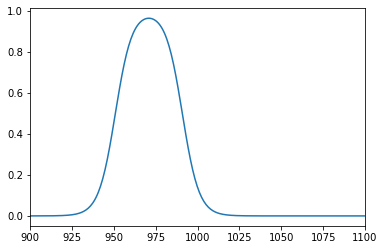

In [285]:
w=apply_window(S,np.abs(S).locate(np.abs(S).max())[0][0],20)
plt.plot(S.axes[0],w)
plt.xlim(900,1100)

In [1]:
from scipy.optimize import minimize

In [3]:
minimize?

In [721]:
plt.figure(figsize=(14,8)); alpha=.5; lw=2; recompute=True
for i in range(20):
    
    s=get_spectrum('Broadband round 1/interferogram%i.txt'%(i+1),recompute=recompute)
    np.abs(s).cslice[600:1850].plot(alpha=alpha,lw=lw,color='b')
    
    s=get_spectrum('Broadband round 2/interferogram%i.txt'%(i+1),recompute=recompute)
    np.abs(s).cslice[600:1850].plot(alpha=alpha,color='r',lw=lw)
    
    s=get_spectrum('Broadband round 3/interferogram%i.txt'%(i+1),recompute=recompute)
    np.abs(s).cslice[600:1850].plot(alpha=alpha,lw=lw,color='c')
    
    plt.axvline(wns[i]+30,color='k',alpha=.2)

OSError: Broadband round 1/interferogram1.txt not found.

<Figure size 1008x576 with 0 Axes>

In [201]:
df=100
shift=30
do_zero=True

for i in range(20):
    
    s=get_spectrum('Broadband round 1/interferogram%i.txt'%(i+1))
    add=np.abs(s).cslice[600:1850].copy()
    if do_zero:
        fcen=wns[i]+shift
        add.cslice[:fcen-df][:]=0
        add.cslice[fcen+df:][:]=0
    if i==0: S1=add; f=add.axes[0]
    else: S1 += add.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True)

for i in range(20):
    
    s=get_spectrum('Broadband round 2/interferogram%i.txt'%(i+1))
    add=np.abs(s).cslice[600:1850].copy()
    if do_zero:
        fcen=wns[i]+shift
        add.cslice[:fcen-df][:]=0
        add.cslice[fcen+df:][:]=0
    if i==0: S2=add; f=add.axes[0]
    else: S2 += add.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True)

for i in range(20):
    
    s=get_spectrum('Broadband round 3/interferogram%i.txt'%(i+1))
    add=np.abs(s).cslice[600:1850].copy()
    if do_zero:
        fcen=wns[i]+shift
        add.cslice[:fcen-df][:]=0
        add.cslice[fcen+df:][:]=0
    if i==0: S3=add; f=add.axes[0]
    else: S3 += add.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True)

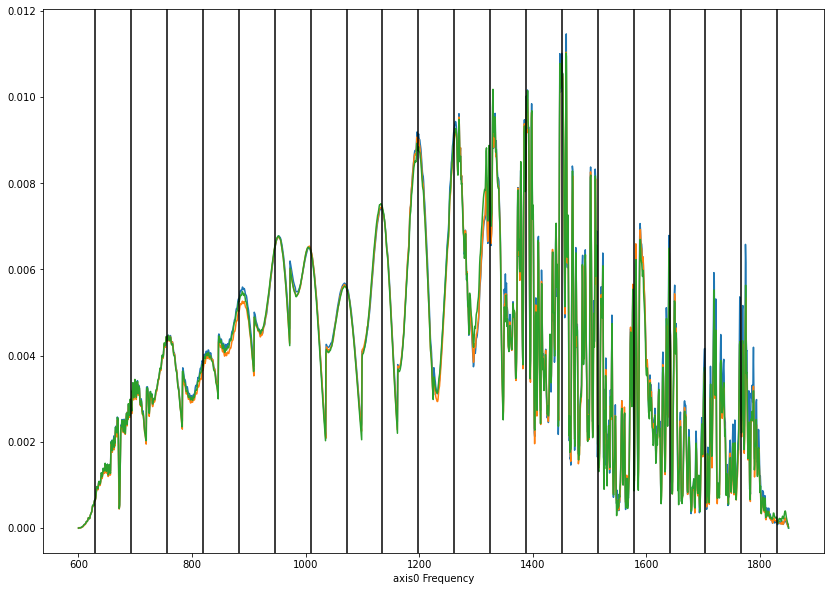

In [202]:
plt.figure(figsize=(14,10))
S1.plot()
S2.plot()
S3.plot()
for i in range(20): plt.axvline(wns[i]+shift,color='k')

(0.0, 1.2)

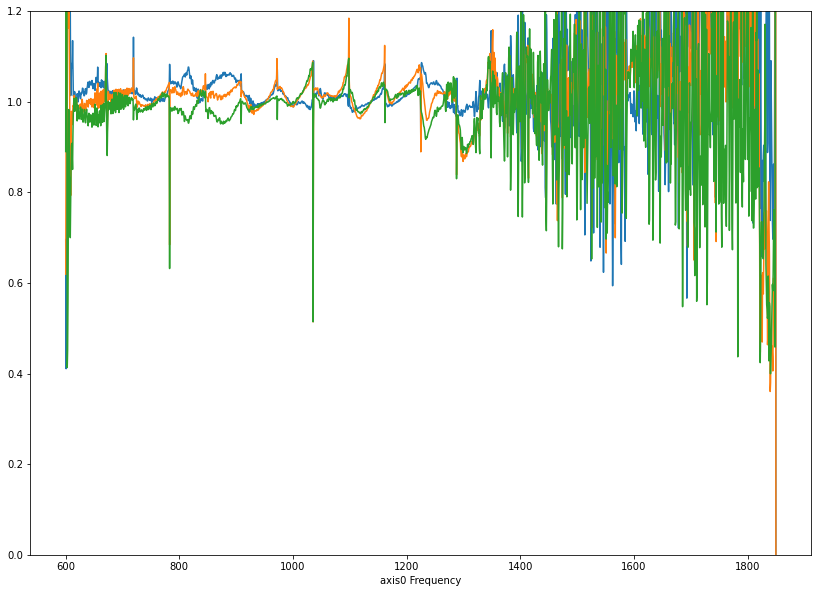

In [203]:
plt.figure(figsize=(14,10))
(S1/S2).plot()
(S1/S3).plot()
(S2/S3).plot()
plt.ylim(0,1.2)

<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<num

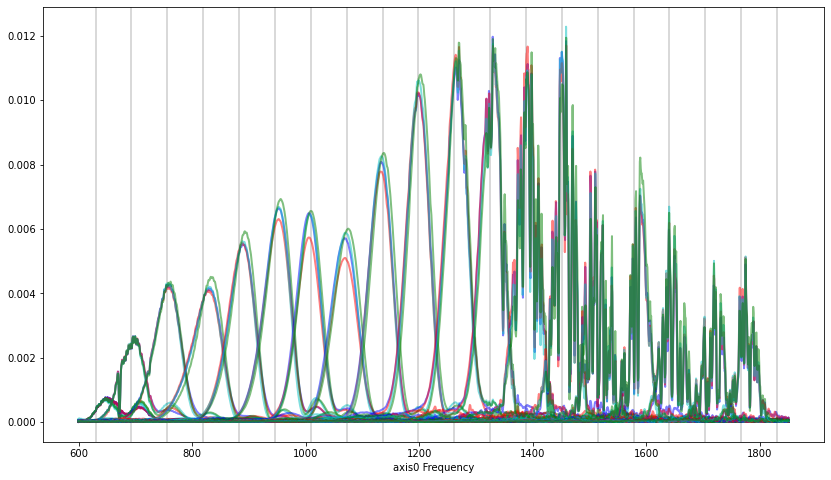

In [217]:
plt.figure(figsize=(14,8)); alpha=.5; lw=2
for i in range(20):
    
    s=get_spectrum('Broadband round 4/interferogram%i.txt'%(i+1))
    np.abs(s).cslice[600:1850].plot(alpha=alpha,lw=lw,color='b')
    
    s=get_spectrum('Broadband round 5/interferogram%i.txt'%(i+1))
    np.abs(s).cslice[600:1850].plot(alpha=alpha,color='r',lw=lw)
    
    s=get_spectrum('Broadband round 6/interferogram%i.txt'%(i+1))
    np.abs(s).cslice[600:1850].plot(alpha=alpha,lw=lw,color='c')
    
    plt.axvline(wns[i]+30,color='k',alpha=.2)

In [215]:
df=100
shift=30
do_zero=False

for i in range(20):
    
    s=get_spectrum('Broadband round 4/interferogram%i.txt'%(i+1))
    add=np.abs(s).cslice[600:1850].copy()
    if do_zero:
        fcen=wns[i]+shift
        add.cslice[:fcen-df][:]=0
        add.cslice[fcen+df:][:]=0
    if i==0: S1=add; f=add.axes[0]
    else: S1 += add.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True)

for i in range(20):
    
    s=get_spectrum('Broadband round 5/interferogram%i.txt'%(i+1))
    add=np.abs(s).cslice[600:1850].copy()
    if do_zero:
        fcen=wns[i]+shift
        add.cslice[:fcen-df][:]=0
        add.cslice[fcen+df:][:]=0
    if i==0: S2=add; f=add.axes[0]
    else: S2 += add.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True)

for i in range(20):
    
    s=get_spectrum('Broadband round 6/interferogram%i.txt'%(i+1))
    add=np.abs(s).cslice[600:1850].copy()
    if do_zero:
        fcen=wns[i]+shift
        add.cslice[:fcen-df][:]=0
        add.cslice[fcen+df:][:]=0
    if i==0: S3=add; f=add.axes[0]
    else: S3 += add.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True)

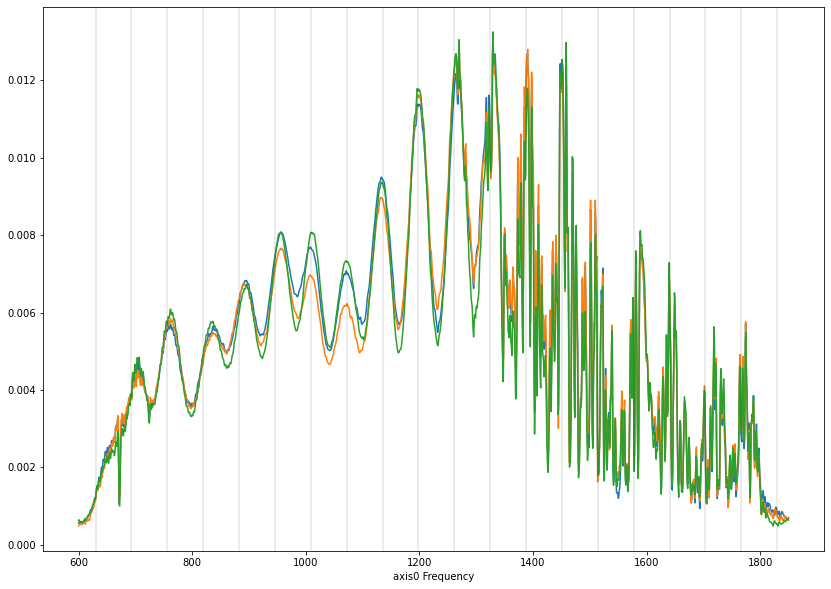

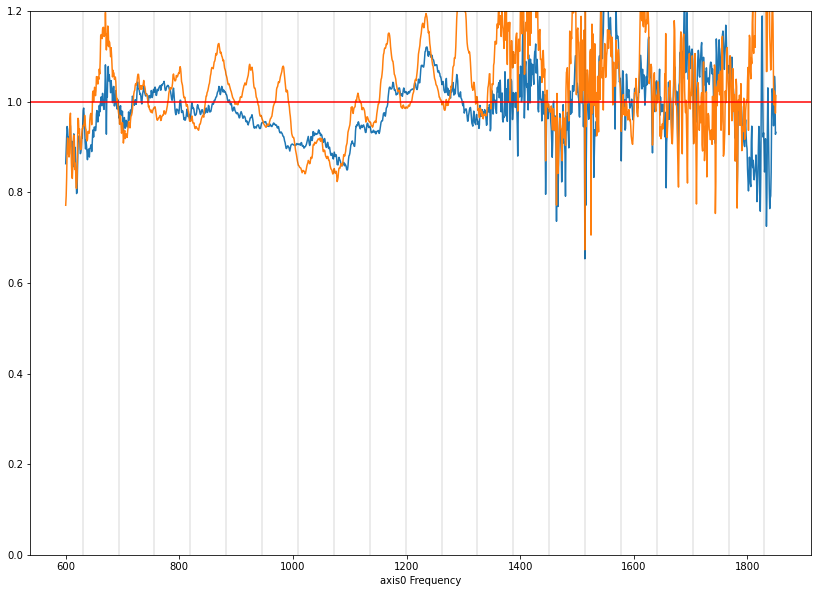

In [216]:
plt.figure(figsize=(14,10))
S1.plot()
S2.plot()
S3.plot()
for i in range(20): plt.axvline(wns[i]+shift,color='k',alpha=.1)
    
plt.figure(figsize=(14,10))
(S2/S1.interpolate_axis(S2.axes[0],axis=0,bounds_error=False,extrapolate=True)).plot()
(S2/S3.interpolate_axis(S2.axes[0],axis=0,bounds_error=False,extrapolate=True)).plot()
for i in range(20): plt.axvline(wns[i]+shift,color='k',alpha=.1)
plt.ylim(0,1.2)
plt.axhline(1,color='r')

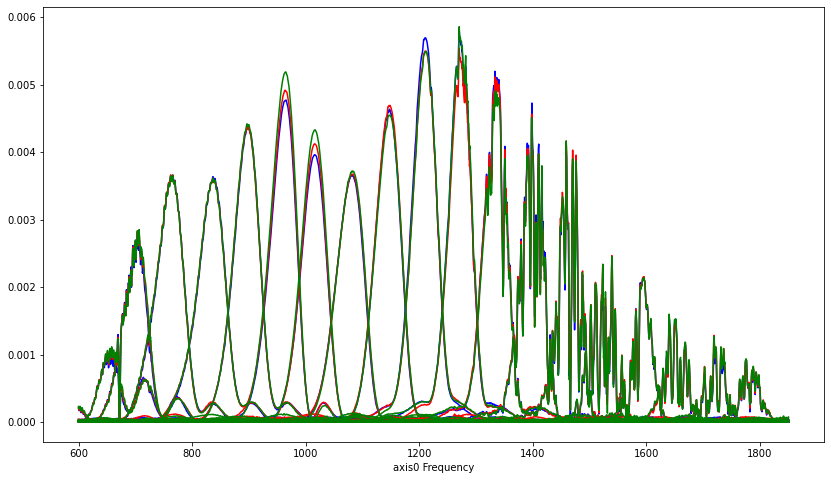

In [225]:
plt.figure(figsize=(14,8))

for i in range(20):
    
    s=get_spectrum('Broadband day 3/Replication 600-1800 cm-1 swept 3x/interferogram%i.txt'%(20+i+1))
    add=np.abs(s).cslice[600:1850].copy()
    add.plot(color='b')
    if do_zero:
        fcen=wns[i]+shift
        add.cslice[:fcen-df][:]=0
        add.cslice[fcen+df:][:]=0
    if i==0: S1=add; f=add.axes[0]
    else: S1 += add.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True)

for i in range(20):
    
    s=get_spectrum('Broadband day 3/Replication 600-1800 cm-1 swept 3x/interferogram%i.txt'%(40+i+1))
    add=np.abs(s).cslice[600:1850].copy()
    add.plot(color='r')
    if do_zero:
        fcen=wns[i]+shift
        add.cslice[:fcen-df][:]=0
        add.cslice[fcen+df:][:]=0
    if i==0: S2=add; f=add.axes[0]
    else: S2 += add.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True)

for i in range(20):
    
    s=get_spectrum('Broadband day 3/Replication 600-1800 cm-1 swept 3x/interferogram%i.txt'%(60+i+1))
    add=np.abs(s).cslice[600:1850].copy()
    add.plot(color='g')
    if do_zero:
        fcen=wns[i]+shift
        add.cslice[:fcen-df][:]=0
        add.cslice[fcen+df:][:]=0
    if i==0: S3=add; f=add.axes[0]
    else: S3 += add.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True)

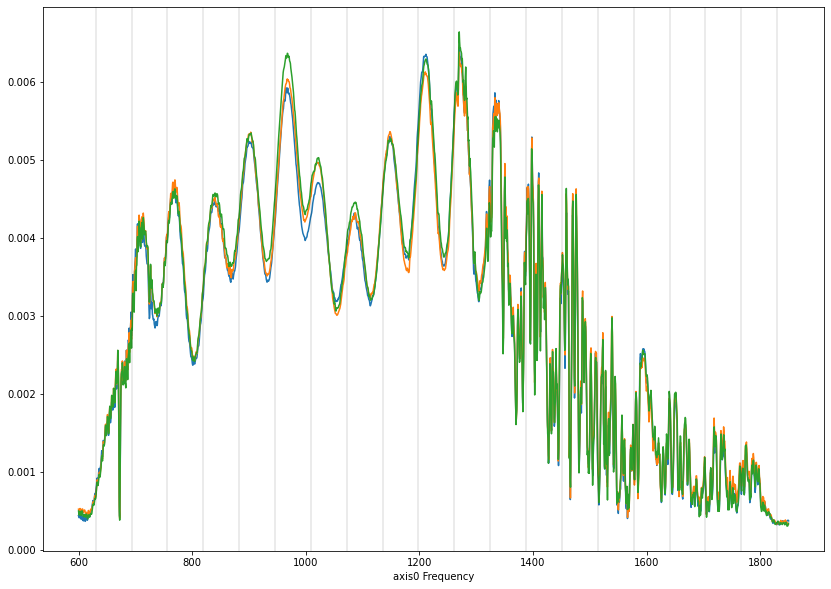

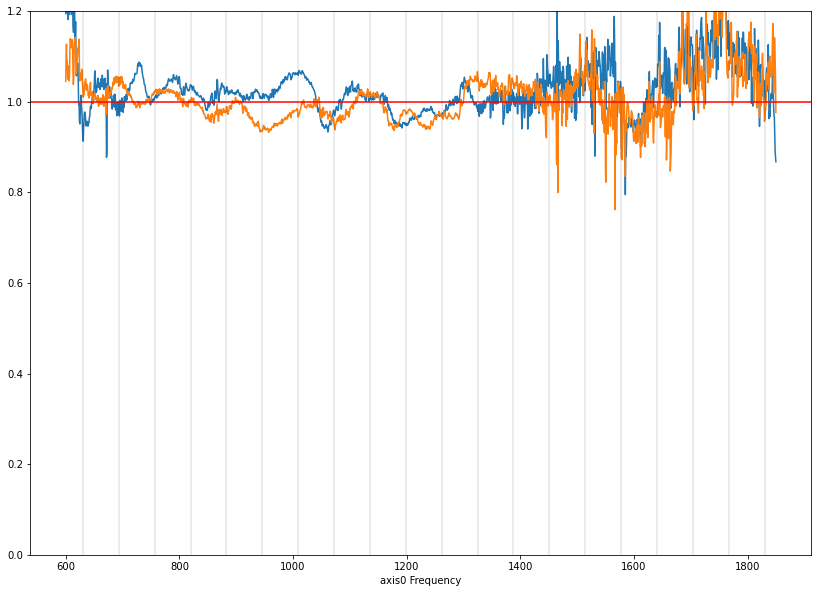

In [226]:
plt.figure(figsize=(14,10))
S1.plot()
S2.plot()
S3.plot()
for i in range(20): plt.axvline(wns[i]+shift,color='k',alpha=.1)
    
plt.figure(figsize=(14,10))
(S2/S1.interpolate_axis(S2.axes[0],axis=0,bounds_error=False,extrapolate=True)).plot()
(S2/S3.interpolate_axis(S2.axes[0],axis=0,bounds_error=False,extrapolate=True)).plot()
for i in range(20): plt.axvline(wns[i]+shift,color='k',alpha=.1)
plt.ylim(0,1.2)
plt.axhline(1,color='r')

# Broadband day 3/Replication 600 cm-1 repeated 10x

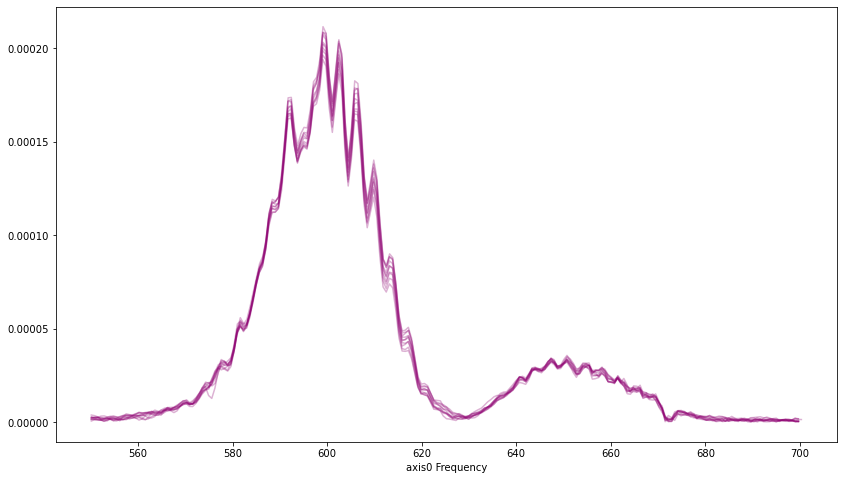

In [347]:
plt.figure(figsize=(14,8))

colors=list(zip(np.linspace(1,0,10),[0]*10,np.linspace(0,1,10)))

Ss=[]
for i in range(10):

    s=get_spectrum('Broadband day 3/Replication 600 cm-1 repeated 10x/interferogram%i.txt'%(i+1),recompute=False)
    S=s.cslice[550:700].copy()
    #add=np.abs(add)
    #add/=np.abs(add).max()
    np.abs(S).plot(color=colors[j],alpha=.3)

    if i==0: f=S.axes[0]
    Ss.append(S)
    

Ss=[S.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True) for S in Ss]

(580.0, 660.0)

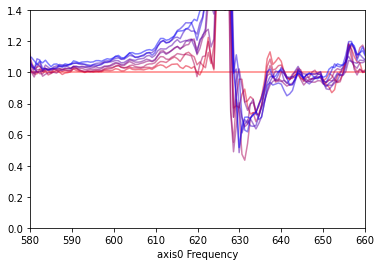

In [348]:
for i in range(10):
    np.abs(Ss[i]/Ss[0]).plot(color=colors[i],alpha=.5)
plt.ylim(0,1.4)
plt.xlim(580,660)

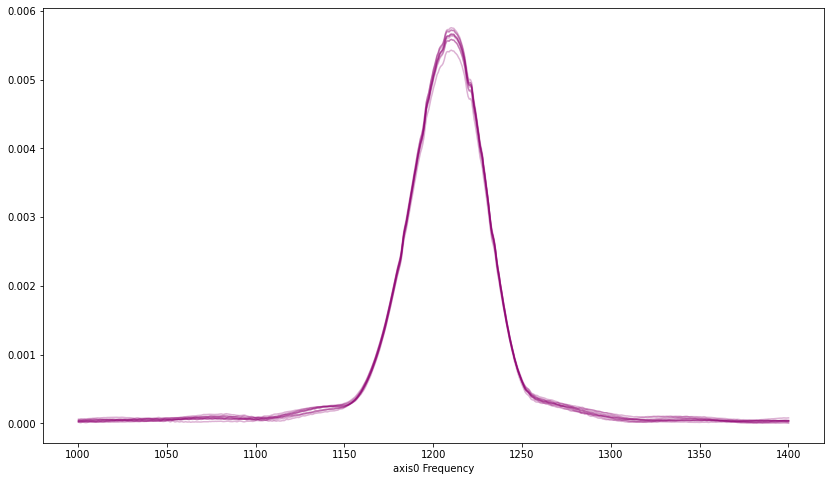

In [370]:
plt.figure(figsize=(14,8))

colors=list(zip(np.linspace(1,0,10),[0]*10,np.linspace(0,1,10)))

Ss=[]
for i in range(10):

    s=get_spectrum('Broadband day 3/Replication 1200 cm-1 repeated 10x/interferogram%i.txt'%(i+11),recompute=False)
    S=s.cslice[1000:1400].copy()
    #add=np.abs(add)
    #add/=np.abs(add).max()
    np.abs(S).plot(color=colors[j],alpha=.3)

    if i==0: f=S.axes[0]
    Ss.append(S)
    

Ss=[S.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True) for S in Ss]

(1150.0, 1250.0)

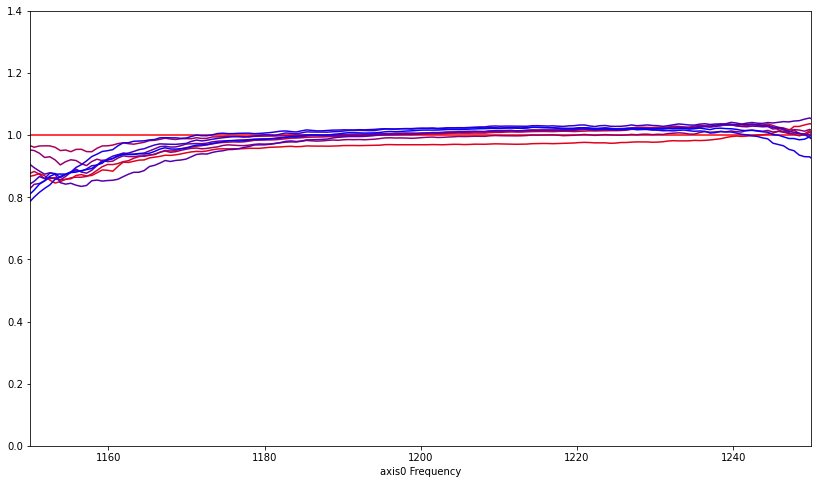

In [371]:
plt.figure(figsize=(14,8))

for i in range(10):
    np.abs(Ss[i]/Ss[0]).plot(color=colors[i])
plt.ylim(0,1.4)
plt.xlim(1150,1250)

# Broadband day 3/Replication 600-1800 cm-1 swept 5x

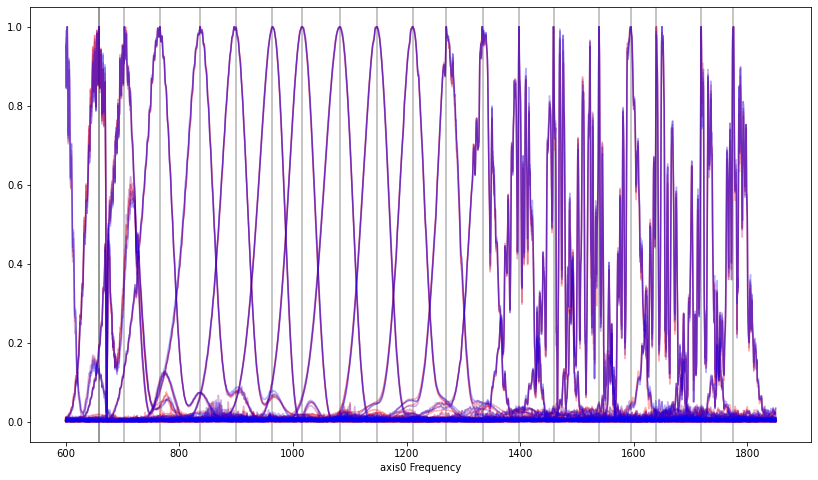

In [312]:
plt.figure(figsize=(14,8))

colors=list(zip(np.linspace(1,0,5),[0]*5,np.linspace(0,1,5)))

Ss=[]
f0s=[]
for j in range(5):
    for i in range(20):

        s=get_spectrum('Broadband day 3/Replication 600-1800 cm-1 swept 5x/interferogram%i.txt'%(j*20+i+1),recompute=False)
        add=s.cslice[600:1850].copy()
        #add=np.abs(add)
        add/=np.abs(add).max()
        np.abs(add).plot(color=colors[j],alpha=.3)
        
        #bandwidth
        if j==0:
            f0=np.abs(add).locate(np.abs(add).max())[0][0]
            plt.axvline(f0,alpha=.3,color='k')
            f0s.append(f0)
        add=apply_window(add,f0s[i],df=70,edge=50)
            
        if i==0: S=add; f=add.axes[0]
        else: S += add.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True)
    Ss.append(S)
    

Ss=[S.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True) for S in Ss]

(0.0, 1.4)

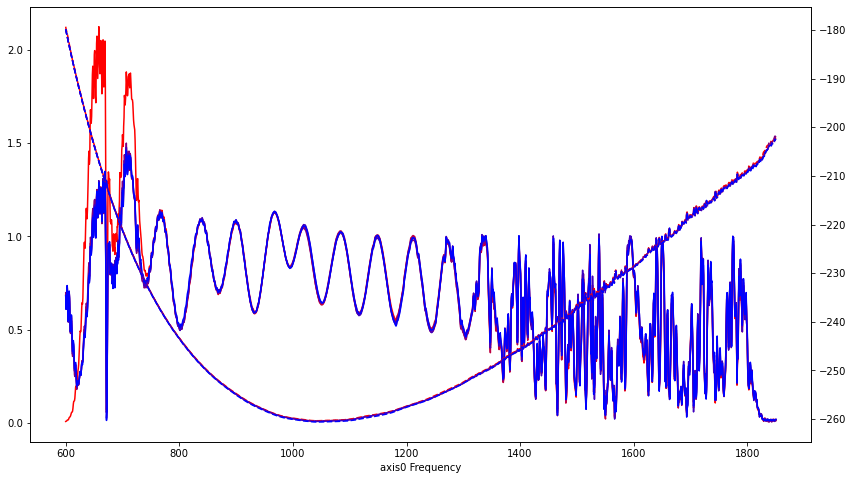

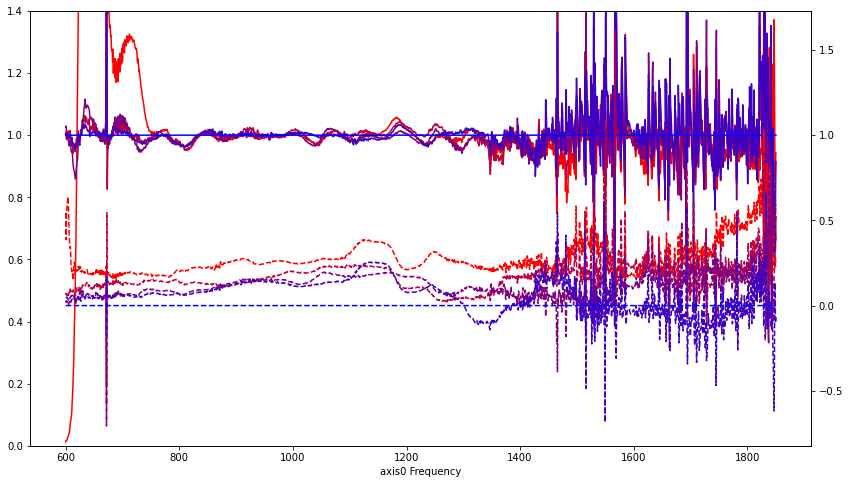

In [313]:
plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S).plot(color=colors[j])
    ax2.plot(f,np.unwrap(np.angle(S)-.3*f,\
                         discont=.7*2*np.pi),color=colors[j],ls='--')


plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
Sref=Ss[-1]
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S/Sref).plot(color=colors[j])
    ax2.plot(f,np.angle(S/Sref),color=colors[j],ls='--')
#plt.axhline(1,color='k',alpha=.2)
plt.ylim(0,1.4)

# Broadband day 3/Replication 600-1800 cm-1 swept 5x_2

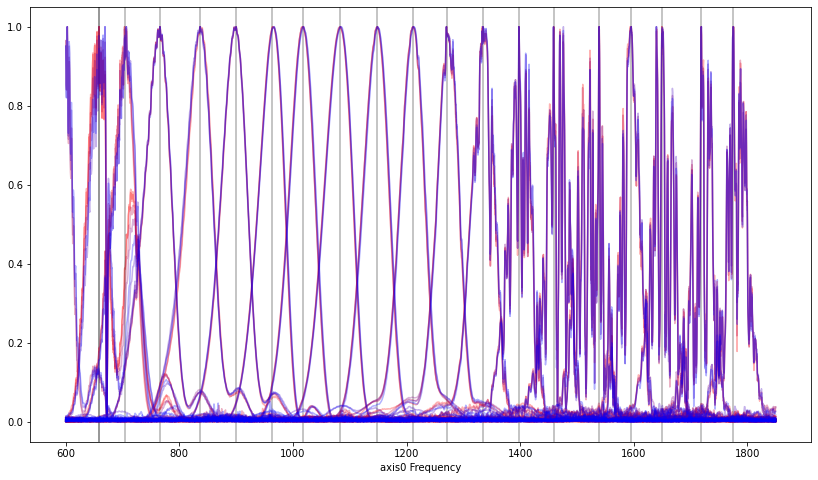

In [358]:
plt.figure(figsize=(14,8))

colors=list(zip(np.linspace(1,0,5),[0]*5,np.linspace(0,1,5)))

Ss=[]
f0s=[]
for j in range(5):
    for i in range(20):

        s=get_spectrum('Broadband day 3/Replication 600-1800 cm-1 swept 5x_2/interferogram%i.txt'%(j*20+i+1),recompute=False)
        add=s.cslice[600:1850].copy()
        #add=np.abs(add)
        add/=np.abs(add).max()
        np.abs(add).plot(color=colors[j],alpha=.3)
        
        #bandwidth
        if j==0:
            f0=np.abs(add).locate(np.abs(add).max())[0][0]
            plt.axvline(f0,alpha=.3,color='k')
            f0s.append(f0)
        add=apply_window(add,f0s[i],df=70,edge=50)
            
        if i==0: S=add; f=add.axes[0]
        else: S += add.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True)
    Ss.append(S)
    

Ss=[S.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True) for S in Ss]

(0.0, 1.4)

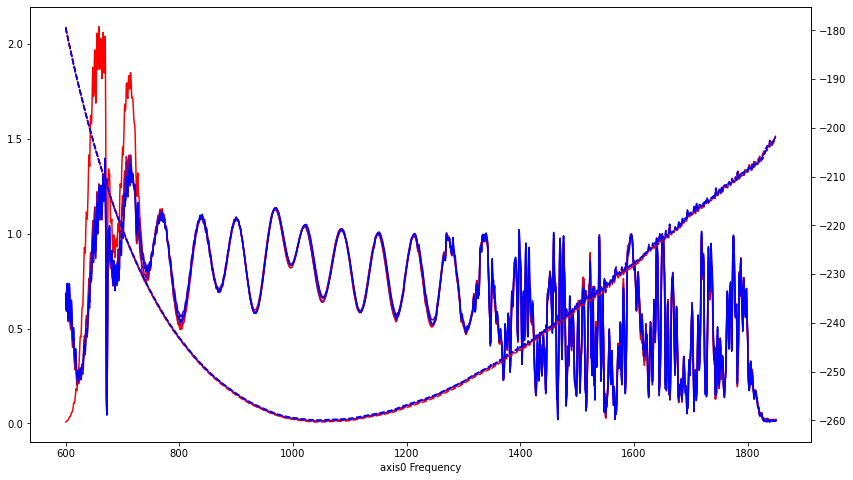

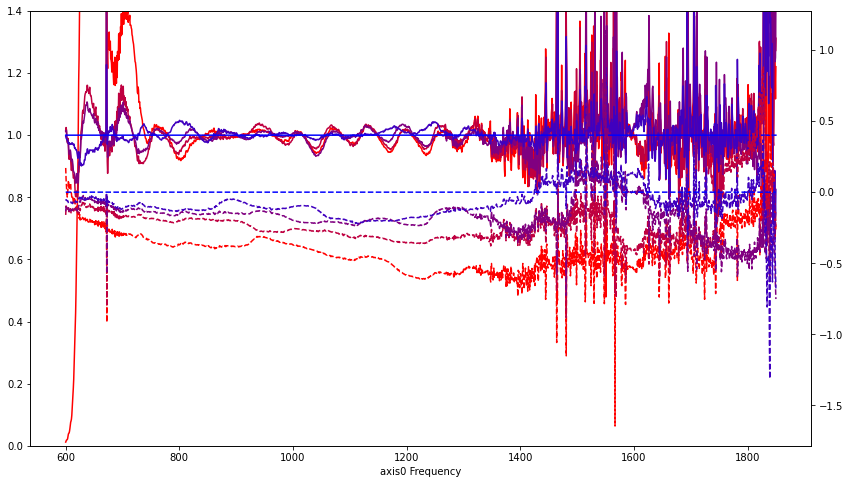

In [359]:
plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S).plot(color=colors[j])
    ax2.plot(f,np.unwrap(np.angle(S)-.3*f,\
                         discont=.7*2*np.pi),color=colors[j],ls='--')


plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
Sref=Ss[-1]
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S/Sref).plot(color=colors[j])
    ax2.plot(f,np.angle(S/Sref),color=colors[j],ls='--')
#plt.axhline(1,color='k',alpha=.2)
plt.ylim(0,1.4)

# Broadband day 3/Replication 600-1800 cm-1 swept 5x_3xLowerPower

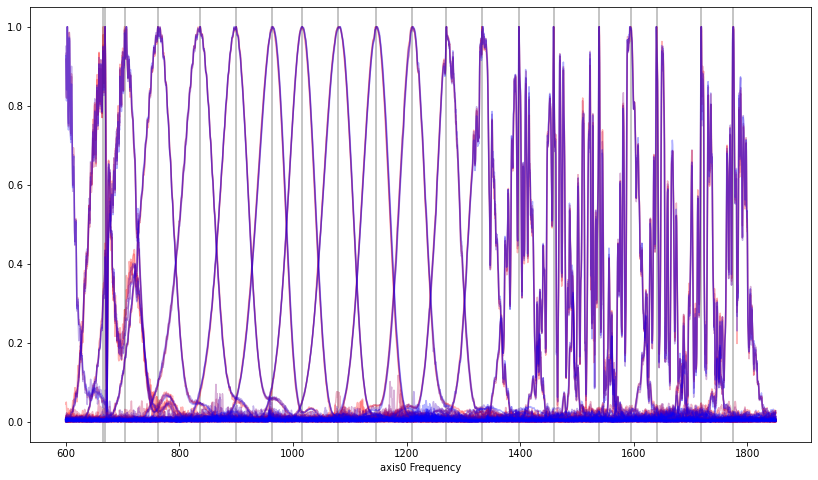

In [368]:
plt.figure(figsize=(14,8))

colors=list(zip(np.linspace(1,0,5),[0]*5,np.linspace(0,1,5)))

Ss=[]
f0s=[]
for j in range(5):
    for i in range(20):

        s=get_spectrum('Broadband day 3/Replication 600-1800 cm-1 swept 5x_3xLowerPower/interferogram%i.txt'%(j*20+i+1),recompute=False)
        add=s.cslice[600:1850].copy()
        #add=np.abs(add)
        add/=np.abs(add).max()
        np.abs(add).plot(color=colors[j],alpha=.3)
        
        #bandwidth
        if j==0:
            f0=np.abs(add).locate(np.abs(add).max())[0][0]
            plt.axvline(f0,alpha=.3,color='k')
            f0s.append(f0)
        add=apply_window(add,f0s[i],df=50,edge=30)
            
        if i==0: S=add; f=add.axes[0]
        else: S += add.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True)
    Ss.append(S)
    

Ss=[S.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True) for S in Ss]

(0.0, 1.4)

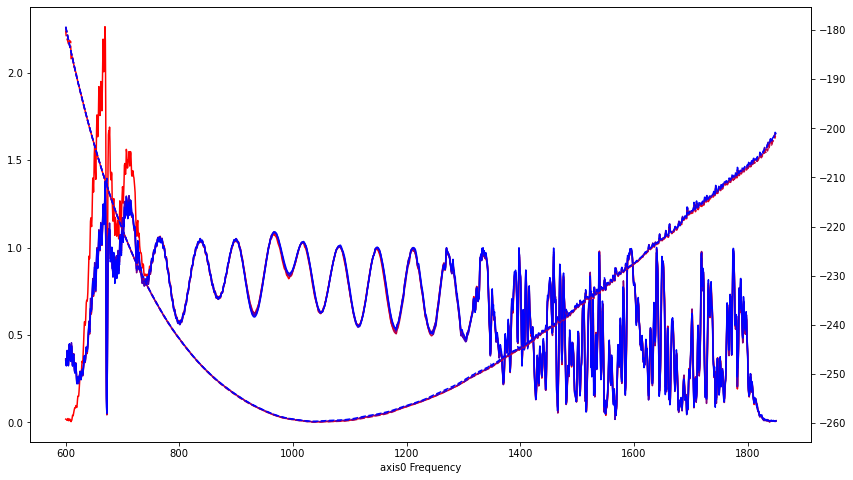

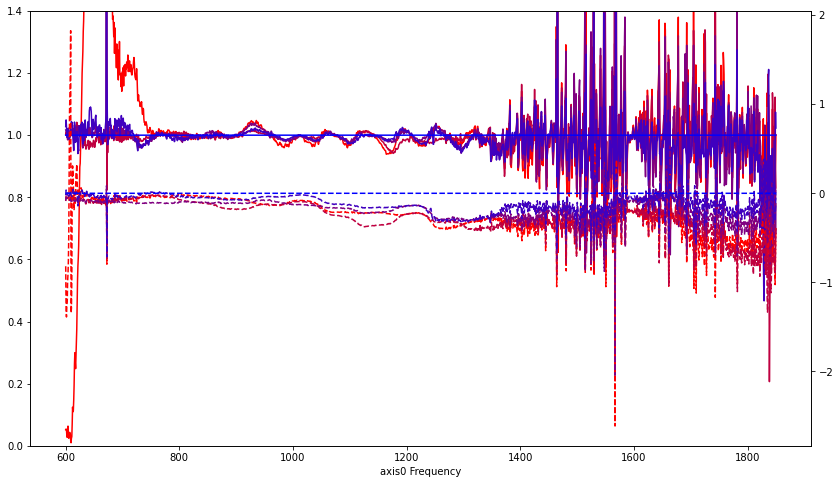

In [369]:
plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S).plot(color=colors[j])
    ax2.plot(f,np.unwrap(np.angle(S)-.3*f,\
                         discont=.7*2*np.pi),color=colors[j],ls='--')


plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
Sref=Ss[-1]
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S/Sref).plot(color=colors[j])
    ax2.plot(f,np.angle(S/Sref),color=colors[j],ls='--')
#plt.axhline(1,color='k',alpha=.2)
plt.ylim(0,1.4)

# Broadband day 3/Replication 600-1800 cm-1 swept 5x_3xLowerPower_5xScanning

<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<num

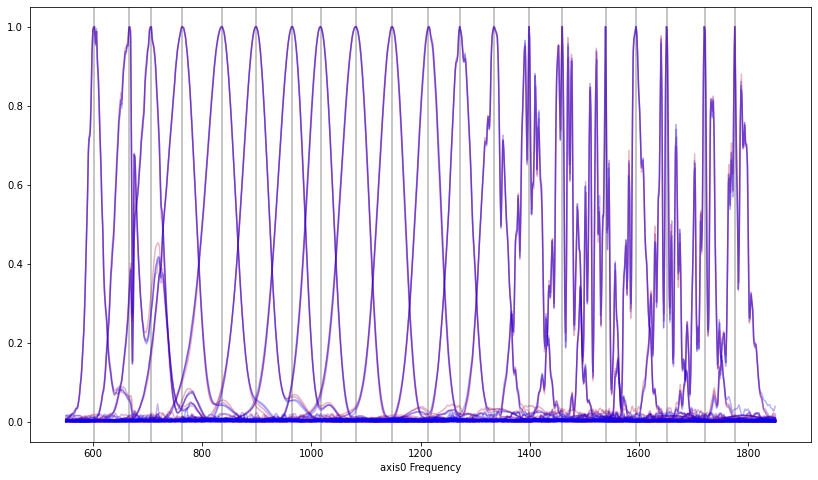

In [753]:
plt.figure(figsize=(14,8))

colors=list(zip(np.linspace(1,0,5),[0]*5,np.linspace(0,1,5)))

Ss=[]
f0s=[]
js=[1,2,3,4]
for j in js:
    for i in range(20):

        s=get_spectrum('Broadband day 3/Replication 600-1800 cm-1 swept 5x_3xLowerPower_5xScanning/interferogram%i.txt'%(j*20+i+1),
                       recompute=True)
        add=s.cslice[550:1850].copy()
        #add=np.abs(add)
        add/=np.abs(add).max()
        np.abs(add).plot(color=colors[j],alpha=.3)
        
        #bandwidth
        if j==js[0]:
            f0=np.abs(add).locate(np.abs(add).max())[0][0]
            plt.axvline(f0,alpha=.3,color='k')
            f0s.append(f0)
        add=apply_window(add,f0s[i],df=50,edge=30)
            
        if i==0: S=add; f=add.axes[0]
        else: S += add.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True)
    Ss.append(S)
    

Ss=[S.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True) for S in Ss]

(0.0, 1.4)

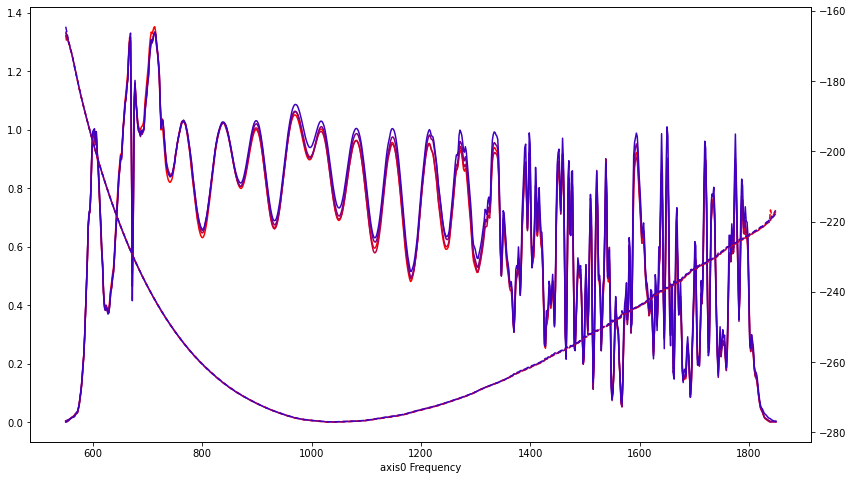

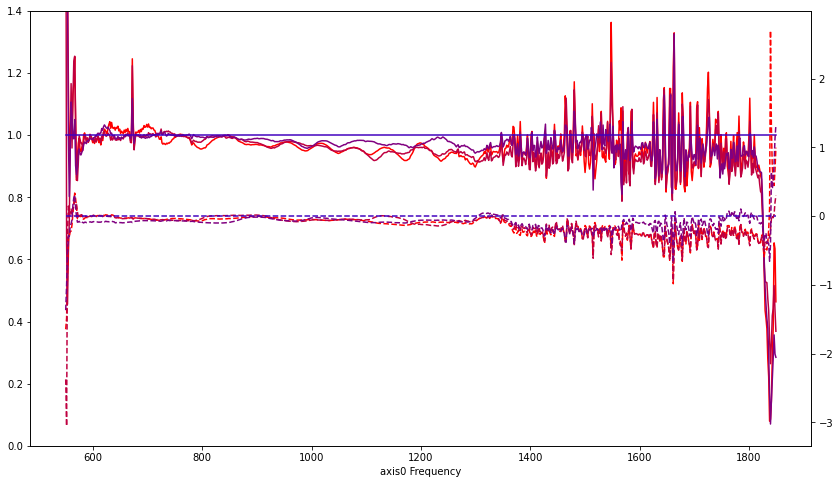

In [754]:
plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S).plot(color=colors[j])
    ax2.plot(f,np.unwrap(np.angle(S)-.3*f,\
                         discont=.7*2*np.pi),color=colors[j],ls='--')


plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
Sref=Ss[-1]
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S/Sref).plot(color=colors[j])
    ax2.plot(f,np.angle(S/Sref),color=colors[j],ls='--')
#plt.axhline(1,color='k',alpha=.2)
plt.ylim(0,1.4)

# Broadband day 3/Replication 600-1800 cm-1 swept 5x_6xLowerPower_5xScanning

<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
0 605.8554386125511
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
1 666.823078914323
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
2 706.3385206277643
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
3 762.2583371674216
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
4 834.8298484799344
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
5 898.9050801153611
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
6 964.7589260818313
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
7 1015.9566400633521
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
8 1080.0031731788954
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples alo

<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.


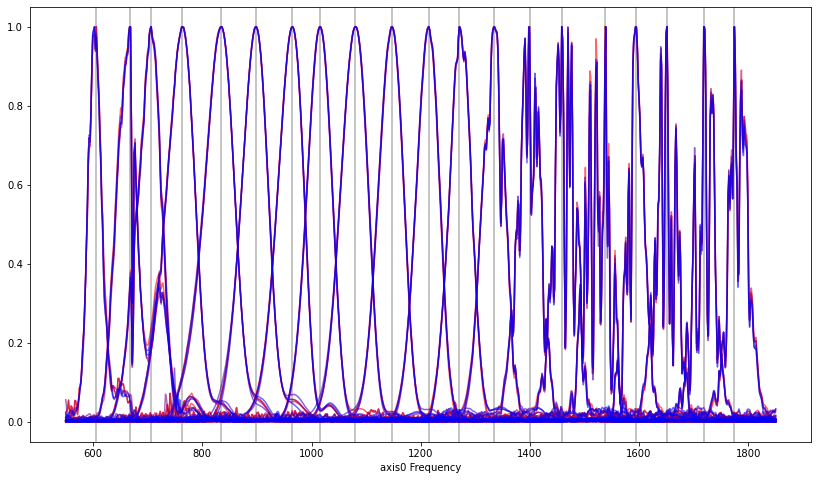

In [755]:
plt.figure(figsize=(14,8))

colors=list(zip(np.linspace(1,0,5),[0]*5,np.linspace(0,1,5)))

Ss=[]
f0s=[]
js=range(5)
for j in js:
    for i in range(20):

        s=get_spectrum('Broadband day 3/Replication 600-1800 cm-1 swept 5x_6xLowerPower_5xScanning/interferogram%i.txt'%(j*20+i+1),
                      recompute=True)
        add=s.cslice[550:1850].copy()
        #add=np.abs(add)
        add/=np.abs(add).max()
        np.abs(add).plot(color=colors[j],alpha=.6)
        
        #bandwidth
        if j==js[0]:
            f0=np.abs(add).locate(np.abs(add).max())[0][0]
            print(i,f0)
            plt.axvline(f0,alpha=.3,color='k')
            f0s.append(f0)
        add=apply_window(add,f0s[i],df=50,edge=30)
            
        if i==0: S=add; f=add.axes[0]
        else: S += add.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True)
    Ss.append(S)
    

Ss=[S.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True) for S in Ss]

(0.0, 1.4)

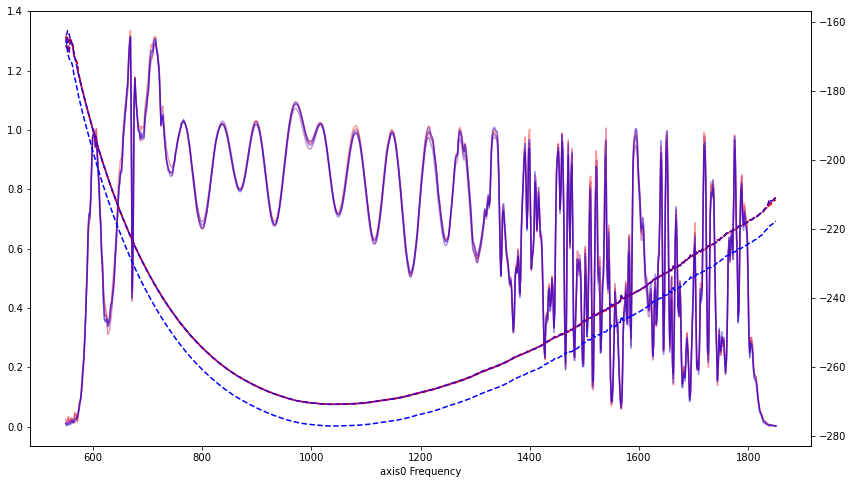

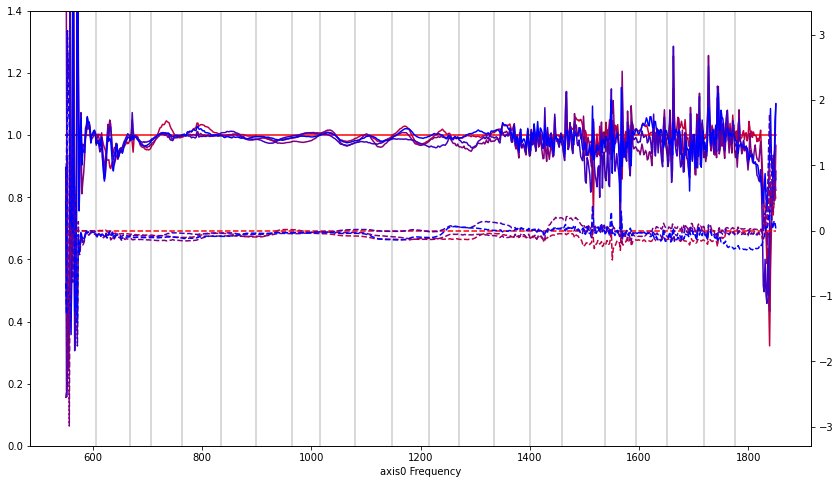

In [756]:
plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S).plot(color=colors[j],alpha=.4)
    ax2.plot(f,np.unwrap(np.angle(S)-.3*f,\
                         discont=.7*2*np.pi),color=colors[j],ls='--')


plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
Sref=Ss[0]
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S/Sref).plot(color=colors[j])
    ax2.plot(f,np.angle(S/Sref),color=colors[j],ls='--')
for i in range(20): plt.axvline(f0s[i],color='k',alpha=.2)
#plt.axhline(1,color='k',alpha=.2)
#plt.ylim(.8,1.2)
plt.ylim(0,1.4)

# Broadband day 3/Replication 600-1800 cm-1 swept 5x_10xLowerPower_5xScanning

<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
0 606.1436186189692
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
1 667.0874063605503
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
2 706.6745228508491
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
3 762.6209114689748
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
4 835.0284155121678
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
5 899.3326515379272
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
6 965.2943365748196
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
7 1016.3593953356035
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
8 1080.688195768046
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples alo

<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.


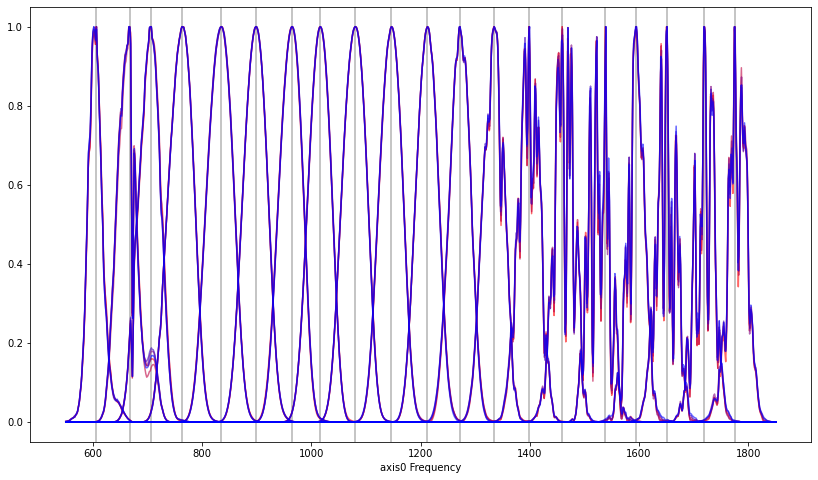

In [757]:
plt.figure(figsize=(14,8))

colors=list(zip(np.linspace(1,0,5),[0]*5,np.linspace(0,1,5)))

Ss=[]
f0s=[]
js=range(5)
maxes=[]
for j in js:
    for i in range(20):

        s=get_spectrum('Broadband day 3/Replication 600-1800 cm-1 swept 5x_10xLowerPower_5xScanning/interferogram%i.txt'%(j*20+i+1),
                      recompute=True)
        add=s.cslice[550:1850].copy()
        #add=np.abs(add)
        max=np.abs(add).max()
        add/=max
        
        #bandwidth
        if j==js[0]:
            f0=np.abs(add).locate(np.abs(add).max())[0][0]
            print(i,f0)
            plt.axvline(f0,alpha=.3,color='k')
            f0s.append(f0)
            maxes.append(max)
        add=apply_window(add,f0s[i],df=40,edge=30)
        np.abs(add).plot(color=colors[j],alpha=.6)
            
        if i==0: S=add; f=add.axes[0]
        else: S += add.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True)
    Ss.append(S)
    

Ss=[S.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True) for S in Ss]

(0.0, 1.4)

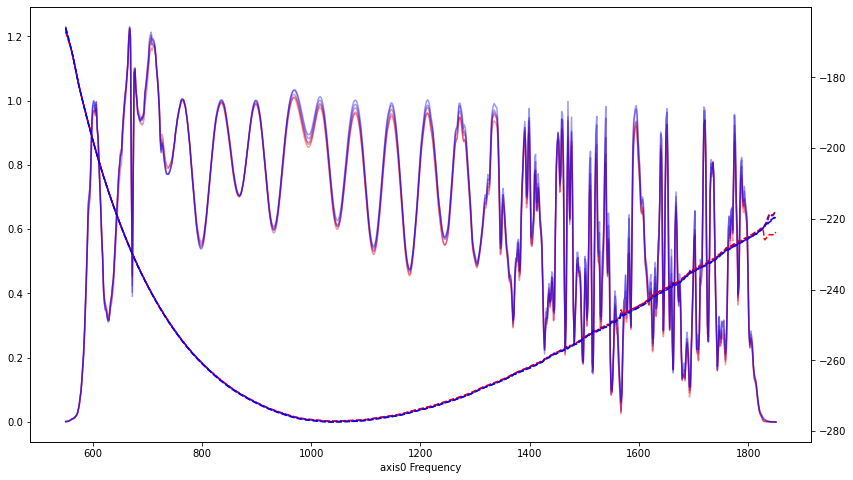

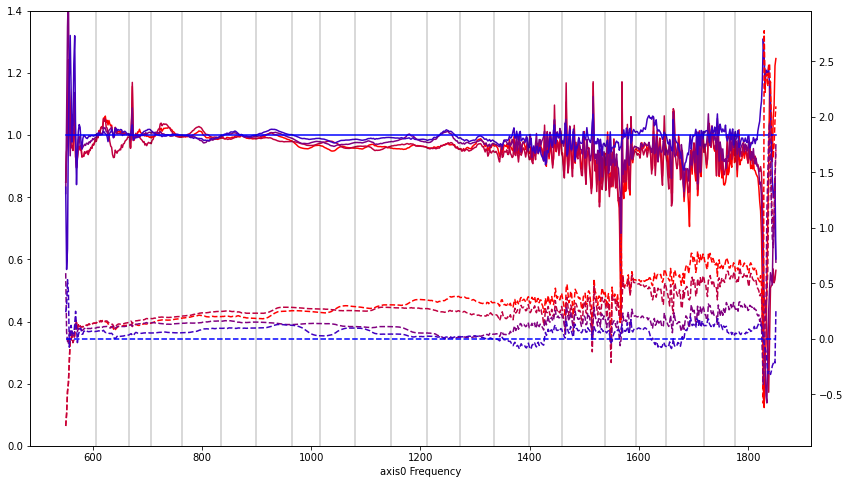

In [758]:
plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S).plot(color=colors[j],alpha=.4)
    ax2.plot(f,np.unwrap(np.angle(S)-.3*f,\
                         discont=.5*2*np.pi),color=colors[j],ls='--')


plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
Sref=Ss[-1]
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S/Sref).plot(color=colors[j])
    ax2.plot(f,np.angle(S/Sref),color=colors[j],ls='--')
for i in range(20): plt.axvline(f0s[i],color='k',alpha=.2)
#plt.axhline(1,color='k',alpha=.2)
#plt.ylim(.8,1.2)
plt.ylim(0,1.4)

(-1.0, 1.0)

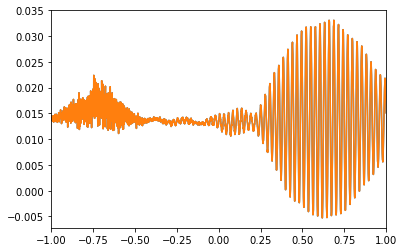

In [759]:
i1,t1=np.loadtxt('Broadband day 3/Replication 600-1800 cm-1 swept 5x_10xLowerPower_5xScanning/interferogram1.txt')
i2,t2=np.loadtxt('Broadband day 3/Replication 600-1800 cm-1 swept 5x_10xLowerPower_5xScanning/interferogram21.txt')

plt.plot(t1,i1,t2,i2)
plt.xlim(-1,1)

<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.


(-0.05, 0.05)

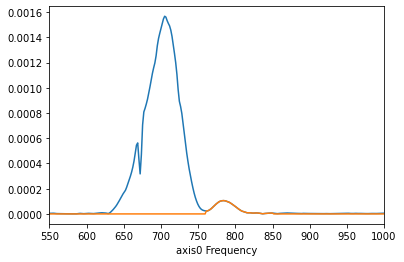

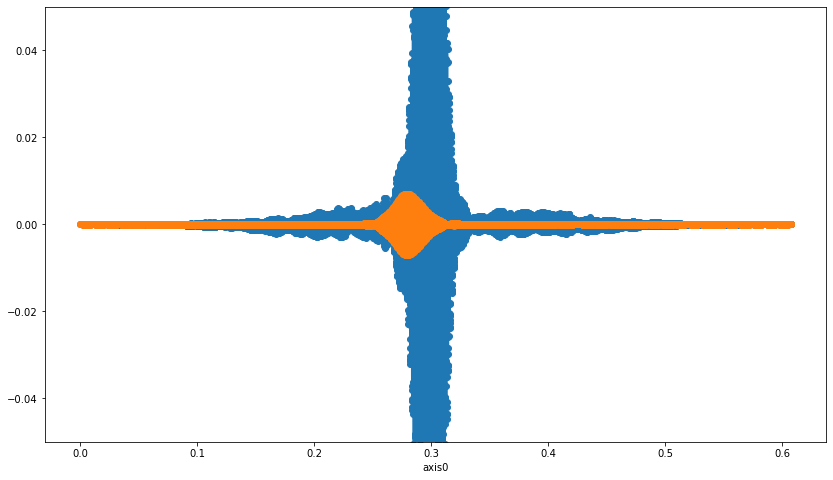

In [801]:
s=get_spectrum('Broadband day 3/Replication 600-1800 cm-1 swept 5x_10xLowerPower_5xScanning/interferogram3.txt',
                      recompute=False)
np.abs(s).cslice[550:1000].plot()
sbp=s.bandpass((760,850),axis=0)
np.abs(sbp).plot()
plt.xlim(550,1000)

plt.figure(figsize=(14,8))
s.get_inverse(origin=.3).plot(marker='o')
sbp.get_inverse(origin=.3).plot(marker='o')
#plt.xlim(.27,.3)
plt.ylim(-.05,.05)


# Broadband day 4/Replication 600-1800 cm-1 swept 2x_1pctPower

<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
0 599.0982955924225
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
1 669.0306809357194
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
2 721.3370480632492
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
3 772.9089632915409
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
4 835.8938258821671
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
5 902.8433990615226
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
6 973.8385021303009
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
7 1022.8302936373799
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
8 1089.1083079467019
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples al

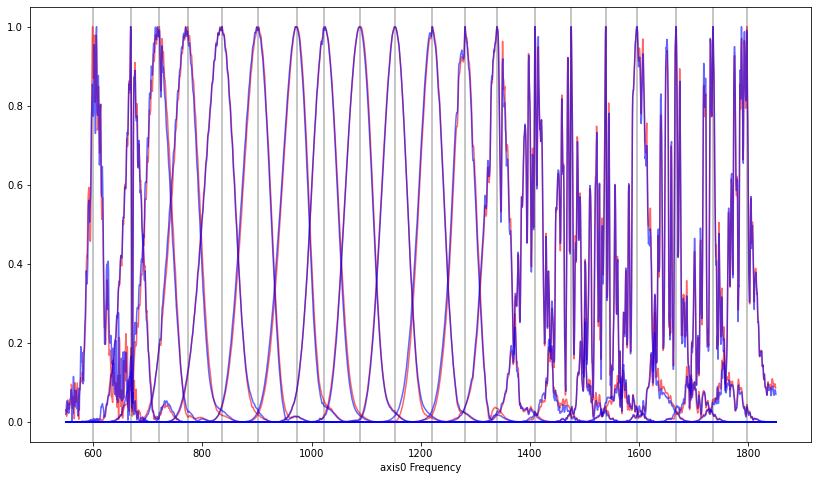

In [802]:
plt.figure(figsize=(14,8))

N=2
colors=list(zip(np.linspace(1,0,N),[0]*5,np.linspace(0,1,N)))

Ss=[]
f0s=[]
js=range(N)
maxes=[]
for j in js:
    for i in range(20):

        s=get_spectrum('Broadband day 4/Replication 600-1800 cm-1 swept 2x_1pctPower/interferogram%i.txt'%(j*20+i+1),
                      recompute=True)
        add=s.cslice[550:1850].copy()
        #add=np.abs(add)
        max=np.abs(add).max()
        add/=max
        
        #bandwidth
        if j==js[0]:
            f0=np.abs(add).locate(np.abs(add).max())[0][0]
            print(i,f0)
            plt.axvline(f0,alpha=.3,color='k')
            f0s.append(f0)
            maxes.append(max)
        add=apply_window(add,f0s[i],df=60,edge=30)
        np.abs(add).plot(color=colors[j],alpha=.6)
            
        if i==0: S=add; f=add.axes[0]
        else: S += add.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True)
    Ss.append(S)
    

Ss=[S.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True) for S in Ss]

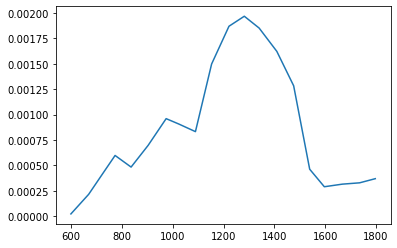

In [803]:
plt.plot(f0s,maxes)

In [804]:
pumps_new = np.max(maxes)*np.array([1]*20)/np.array(maxes)
print(pumps_new)

[89.34684341  9.14377455  4.82268345  3.29387121  4.07348516  2.82549581
  2.05021675  2.16766011  2.36509561  1.31392737  1.05266848  1.
  1.06282066  1.21316722  1.53354797  4.25908877  6.79736303  6.24570617
  5.99780342  5.33421234]


(0.0, 1.4)

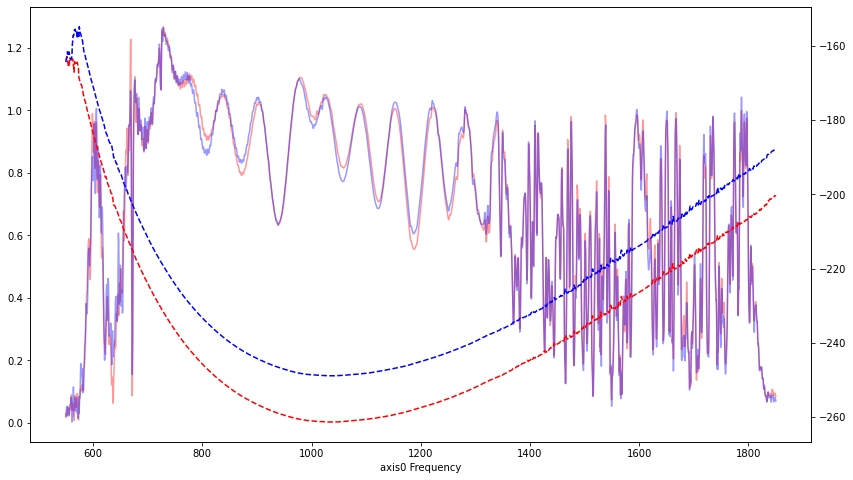

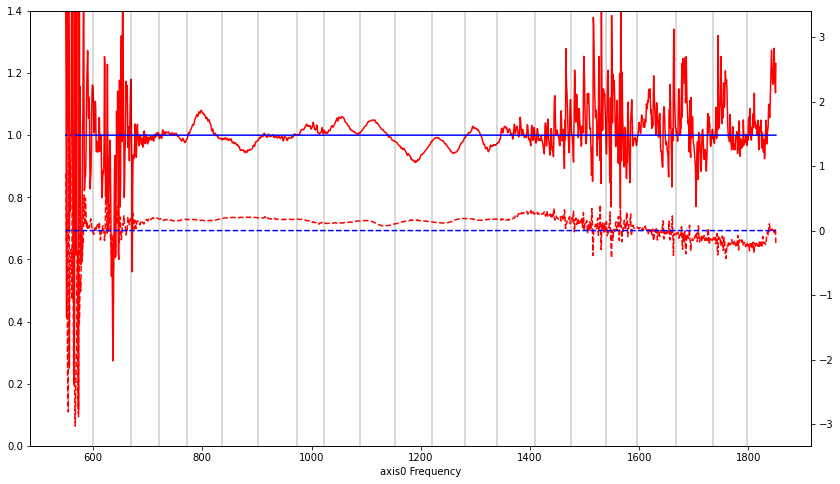

In [805]:
plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S).plot(color=colors[j],alpha=.4)
    ax2.plot(f,np.unwrap(np.angle(S)-.3*f,\
                         discont=.5*2*np.pi),color=colors[j],ls='--')


plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
Sref=Ss[-1]
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S/Sref).plot(color=colors[j])
    ax2.plot(f,np.angle(S/Sref),color=colors[j],ls='--')
for i in range(20): plt.axvline(f0s[i],color='k',alpha=.2)
#plt.axhline(1,color='k',alpha=.2)
#plt.ylim(.8,1.2)
plt.ylim(0,1.4)

# Broadband day 4/Replication 600-1800 cm-1 swept 2x_tunedPower

<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
0 606.4697505002754
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
1 668.8136241256401
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
2 713.7599719567913
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
3 769.3863359684474
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
4 832.3580252521812
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
5 900.045755163993
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
6 970.4454829985294
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
7 1023.9291670095874
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
8 1086.3545563073958
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples alo

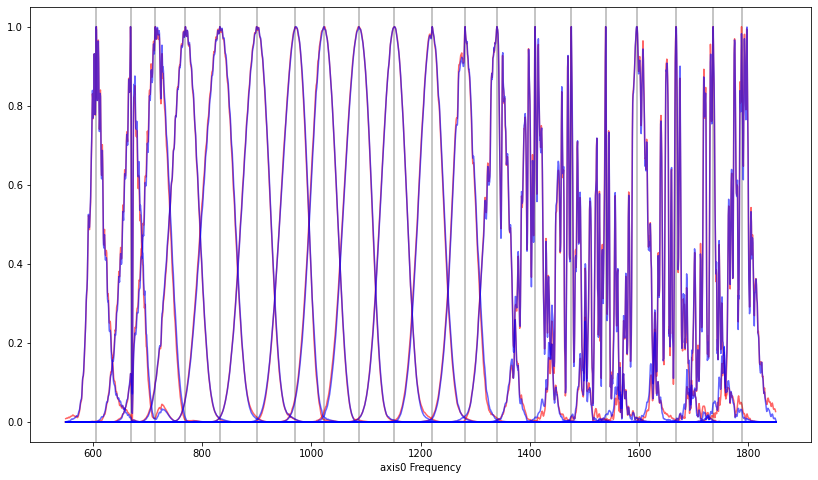

In [806]:
plt.figure(figsize=(14,8))

N=2
colors=list(zip(np.linspace(1,0,N),[0]*5,np.linspace(0,1,N)))

Ss=[]
f0s=[]
js=range(N)
maxes=[]
for j in js:
    for i in range(20):

        s=get_spectrum('Broadband day 4/Replication 600-1800 cm-1 swept 2x_tunedPower/interferogram%i.txt'%(j*20+i+1),
                      recompute=True)
        add=s.cslice[550:1850].copy()
        #add=np.abs(add)
        max=np.abs(add).max()
        add/=max
        
        #bandwidth
        if j==js[0]:
            f0=np.abs(add).locate(np.abs(add).max())[0][0]
            print(i,f0)
            plt.axvline(f0,alpha=.3,color='k')
            f0s.append(f0)
            maxes.append(max)
        add=apply_window(add,f0s[i],df=50,edge=30)
        np.abs(add).plot(color=colors[j],alpha=.6)
            
        if i==0: S=add; f=add.axes[0]
        else: S += add.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True)
    Ss.append(S)
    

Ss=[S.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True) for S in Ss]

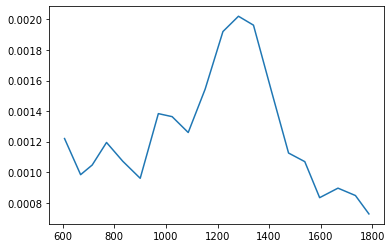

In [807]:
plt.plot(f0s,maxes)

In [808]:
pumps_new = np.max(maxes)*np.array(pumps_new)/np.array(maxes)
print(pumps_new)

[148.01015864  18.79117235   9.31227896   5.57371647   7.68345323
   5.95002981   2.99547075   3.21307692   3.79464568   1.72036488
   1.10765021   1.           1.09447315   1.60262264   2.75432509
   8.05330082  16.4942985   14.10002988  14.31319151  14.83954905]


(0.0, 1.4)

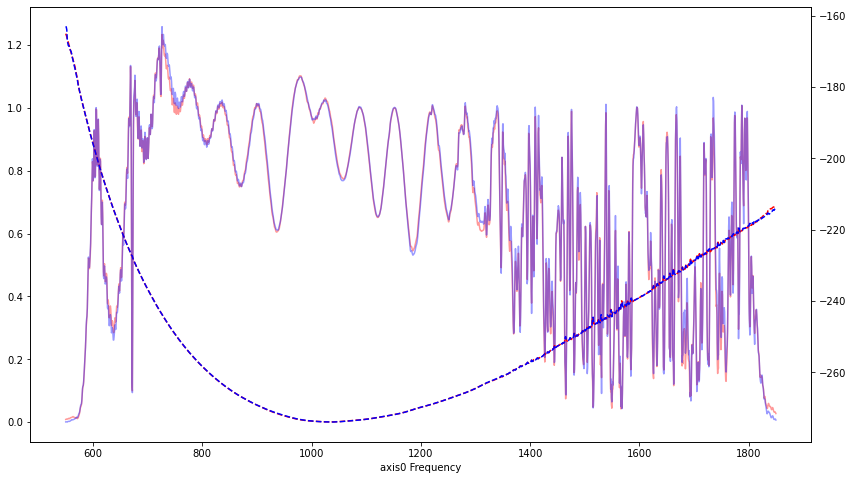

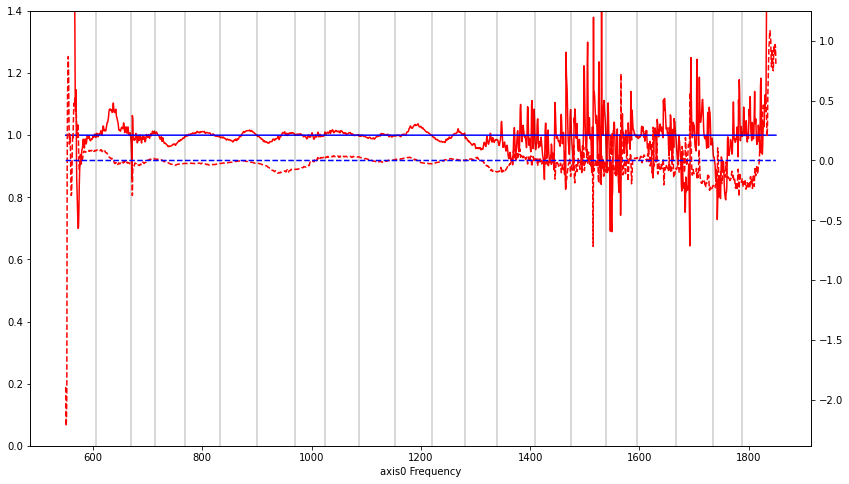

In [809]:
plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S).plot(color=colors[j],alpha=.4)
    ax2.plot(f,np.unwrap(np.angle(S)-.3*f,\
                         discont=.5*2*np.pi),color=colors[j],ls='--')


plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
Sref=Ss[-1]
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S/Sref).plot(color=colors[j])
    ax2.plot(f,np.angle(S/Sref),color=colors[j],ls='--')
for i in range(20): plt.axvline(f0s[i],color='k',alpha=.2)
#plt.axhline(1,color='k',alpha=.2)
#plt.ylim(.8,1.2)
plt.ylim(0,1.4)

# Broadband day 4/Replication 600-1800 cm-1 swept 2x_tunedPower2

<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
0 606.3133135971676
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
1 668.7489001782066
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
2 714.3379911094759
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
3 769.262261928438
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
4 832.1969665661625
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
5 899.9006151906226
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
6 970.8025573778176
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
7 1022.5229626067685
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
8 1087.414320802516
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples alon

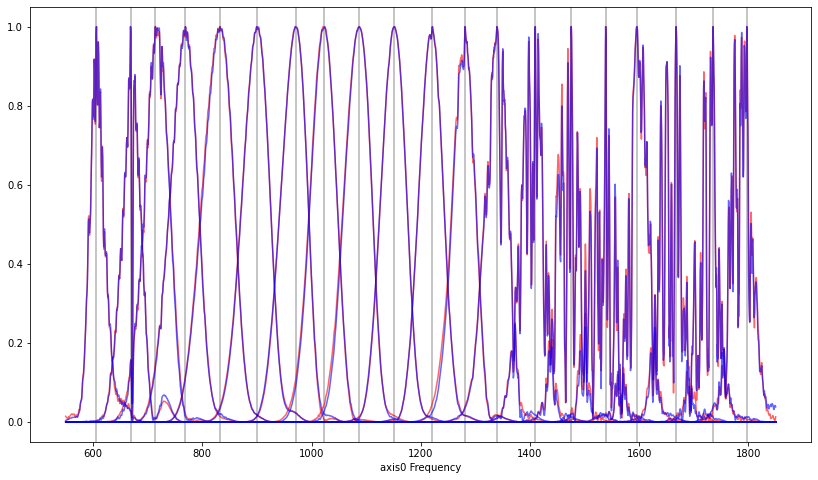

In [810]:
plt.figure(figsize=(14,8))

N=2
colors=list(zip(np.linspace(1,0,N),[0]*5,np.linspace(0,1,N)))

Ss=[]
f0s=[]
js=range(N)
maxes=[]
for j in js:
    for i in range(20):

        s=get_spectrum('Broadband day 4/Replication 600-1800 cm-1 swept 2x_tunedPower2/interferogram%i.txt'%(j*20+i+1),
                      recompute=True)
        add=s.cslice[550:1850].copy()
        #add=np.abs(add)
        max=np.abs(add).max()
        add/=max
        
        #bandwidth
        if j==js[0]:
            f0=np.abs(add).locate(np.abs(add).max())[0][0]
            print(i,f0)
            plt.axvline(f0,alpha=.3,color='k')
            f0s.append(f0)
            maxes.append(max)
        add=apply_window(add,f0s[i],df=60,edge=30)
        np.abs(add).plot(color=colors[j],alpha=.6)
            
        if i==0: S=add; f=add.axes[0]
        else: S += add.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True)
    Ss.append(S)
    

Ss=[S.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True) for S in Ss]

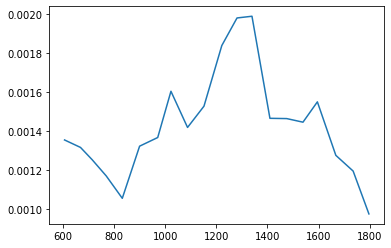

In [811]:
plt.plot(f0s,maxes)

(0.0, 1.4)

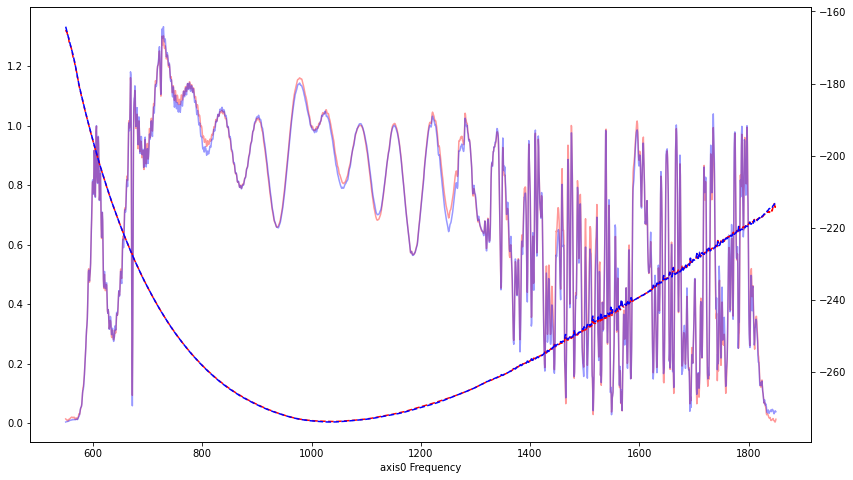

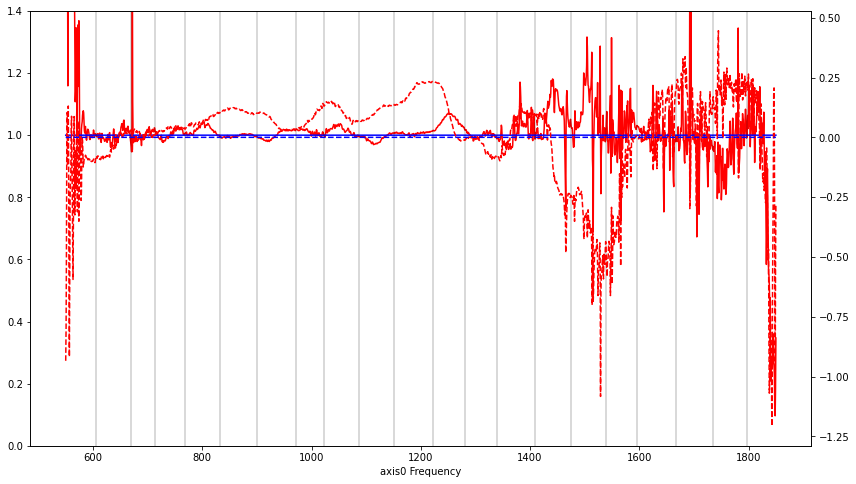

In [812]:
plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S).plot(color=colors[j],alpha=.4)
    ax2.plot(f,np.unwrap(np.angle(S)-.3*f,\
                         discont=.5*2*np.pi),color=colors[j],ls='--')


plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
Sref=Ss[-1]
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S/Sref).plot(color=colors[j])
    ax2.plot(f,np.angle(S/Sref),color=colors[j],ls='--')
for i in range(20): plt.axvline(f0s[i],color='k',alpha=.2)
#plt.axhline(1,color='k',alpha=.2)
#plt.ylim(.8,1.2)
plt.ylim(0,1.4)

# Broadband day 4/Replication 600-1800 cm-1 swept 2x_tunedPower3

<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
0 606.2351372742808
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
1 669.1600669785117
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
2 714.0616858586413
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
3 769.6345507100868
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
4 832.6253983113904
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
5 899.6105479438605
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
6 970.5522375244595
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
7 1021.457668892202
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
8 1086.4290747168209
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples alo

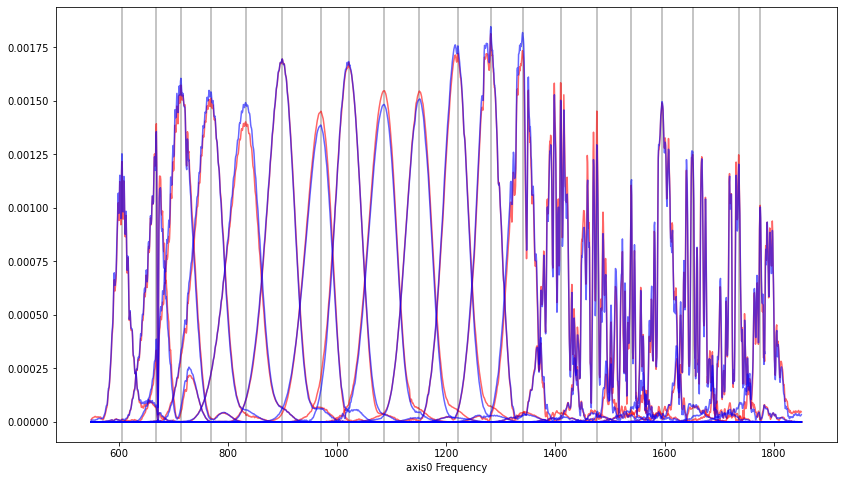

In [813]:
plt.figure(figsize=(14,8))

N=2
colors=list(zip(np.linspace(1,0,N),[0]*5,np.linspace(0,1,N)))

Ss=[]
f0s=[]
js=range(N)
maxes=[]
for j in js:
    for i in range(20):

        s=get_spectrum('Broadband day 4/Replication 600-1800 cm-1 swept 2x_tunedPower3/interferogram%i.txt'%(j*20+i+1),
                      recompute=True)
        add=s.cslice[550:1850].copy()
        #add=np.abs(add)
        max=np.abs(add).max()
        #add/=max
        
        #bandwidth
        if j==js[0]:
            f0=np.abs(add).locate(np.abs(add).max())[0][0]
            print(i,f0)
            plt.axvline(f0,alpha=.3,color='k')
            f0s.append(f0)
            maxes.append(max)
        add=apply_window(add,f0s[i],df=80,edge=30)
        np.abs(add).plot(color=colors[j],alpha=.6)
            
        if i==0: S=add; f=add.axes[0]
        else: S += add.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True)
    Ss.append(S)
    

Ss=[S.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True) for S in Ss]

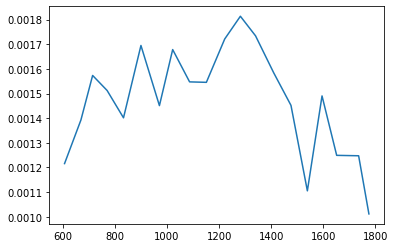

In [814]:
plt.plot(f0s,maxes)

(0.0, 1.4)

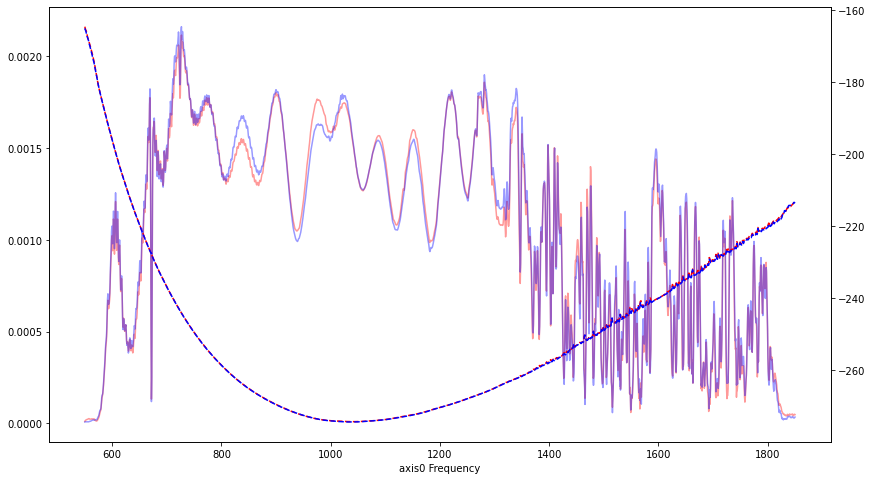

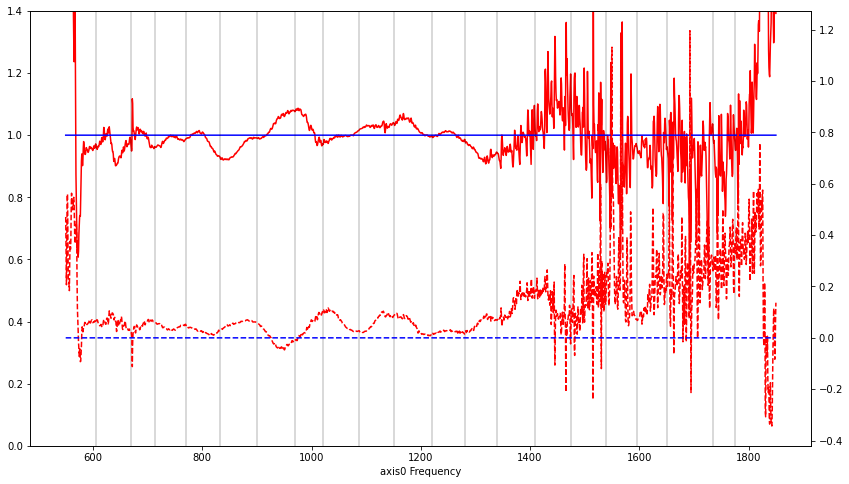

In [815]:
plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S).plot(color=colors[j],alpha=.4)
    ax2.plot(f,np.unwrap(np.angle(S)-.3*f,\
                         discont=.5*2*np.pi),color=colors[j],ls='--')


plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
Sref=Ss[-1]
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S/Sref).plot(color=colors[j])
    ax2.plot(f,np.angle(S/Sref),color=colors[j],ls='--')
for i in range(20): plt.axvline(f0s[i],color='k',alpha=.2)
#plt.axhline(1,color='k',alpha=.2)
#plt.ylim(.8,1.2)
plt.ylim(0,1.4)

# Broadband day 4/Replication 600-1800 cm-1 swept 2x_tunedPower4

In [816]:
from scipy.optimize import minimize

def add_spectra(S,add):
    
    f=S.axes[0]
    add=add.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True)
    
    add0=np.array(add); S0=np.array(S)
    def to_minimize(x,*args):
        phi=x[0]
        add0_tuned=add0*np.exp(1j*f*phi)
        return 1/np.sum(np.abs(add0_tuned+S0)**2)
    
    result=minimize(to_minimize,(0,),bounds=[(-1e-2,1e-2)],method='Powell')
    phi=result['x'][0]
    #phi=0
    print('phi=%s'%phi)
    
    return S + np.exp(1j*f*phi)*add

<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
0 606.2155963434057
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
1 669.1600669785117
phi=-8.717937237331076e-05
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
2 714.0616858586413
phi=-4.461309339585939e-06
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
3 769.6841687603852
phi=-1.7716108656880725e-05
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
4 836.0016036666325
phi=-0.00011670614430789986
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
5 899.6105479438605
phi=-0.00023187696584652423
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
6 970.6773818173983
phi=-0.007040373326006019
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
7 1020.2167006284304
phi=-0.0008

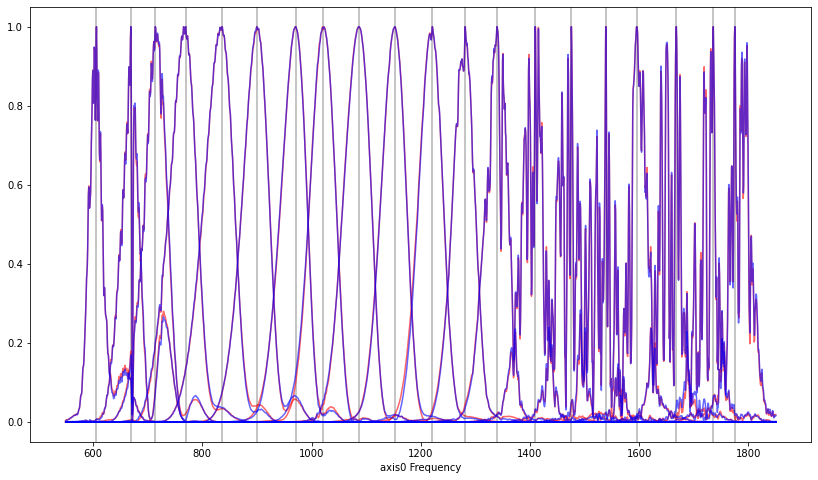

In [817]:
plt.figure(figsize=(14,8))

N=2
colors=list(zip(np.linspace(1,0,N),[0]*5,np.linspace(0,1,N)))

Ss=[]
f0s=[]
js=range(N)
maxes=[]
for j in js:
    for i in range(20):

        s=get_spectrum('Broadband day 4/Replication 600-1800 cm-1 swept 2x_tunedPower4/interferogram%i.txt'%(j*20+i+1),
                      recompute=True)
        add=s.cslice[550:1850].copy()
        #add=np.abs(add)
        max=np.abs(add).max()
        add/=max
        
        #bandwidth
        if j==js[0]:
            f0=np.abs(add).locate(np.abs(add).max())[0][0]
            print(i,f0)
            plt.axvline(f0,alpha=.3,color='k')
            f0s.append(f0)
            maxes.append(max)
        add=apply_window(add,f0s[i],df=80,edge=30)
        np.abs(add).plot(color=colors[j],alpha=.6)
            
        if i==0: S=add; f=add.axes[0]
        else: S=add_spectra(S,add)
    Ss.append(S)
    

Ss=[S.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True) for S in Ss]

(0.0, 1.4)

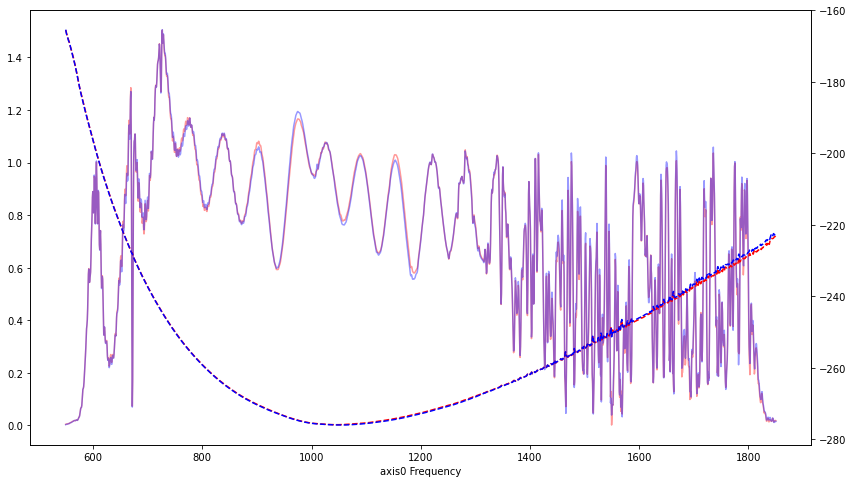

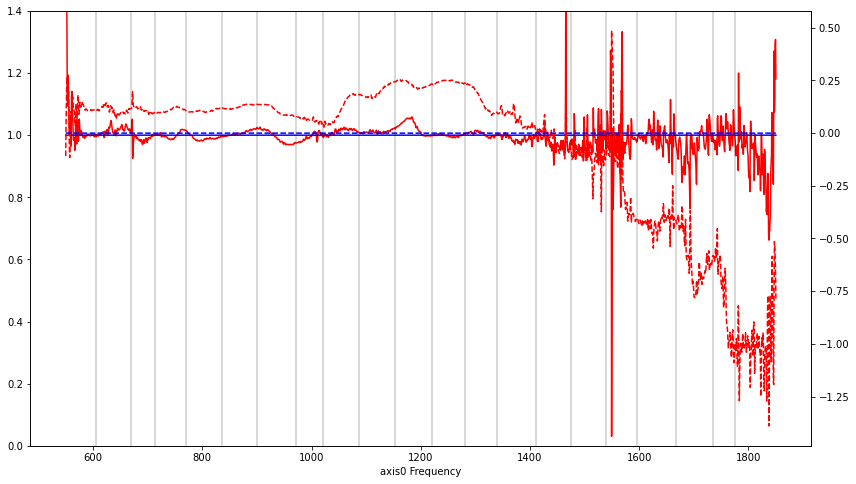

In [818]:
plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S).plot(color=colors[j],alpha=.4)
    ax2.plot(f,np.unwrap(np.angle(S)-.3*f,\
                         discont=1*np.pi),color=colors[j],ls='--')


plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
Sref=Ss[-1]
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S/Sref).plot(color=colors[j])
    ax2.plot(f,np.angle(S/Sref),color=colors[j],ls='--')
for i in range(20): plt.axvline(f0s[i],color='k',alpha=.2)
#plt.axhline(1,color='k',alpha=.2)
#plt.ylim(.8,1.2)
plt.ylim(0,1.4)

# Broadband day 4/Replication 600-1800 cm-1 swept 5x_tunedPower

In [819]:
from scipy.optimize import minimize

def add_spectra(S,add):
    
    f=S.axes[0]
    add=add.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True)
    
    add0=np.array(add); S0=np.array(S)
    def to_minimize(x,*args):
        phi=x[0]
        add0_tuned=add0*np.exp(1j*f*phi)
        return 1/np.sum(np.abs(add0_tuned+S0)**2)
    
    #result=minimize(to_minimize,(0,),bounds=[(-1e-2,1e-2)],method='Powell')
    #phi=result['x'][0]
    phi=0
    print('phi=%s'%phi)
    
    return S + np.exp(1j*f*phi)*add

<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
0 606.2155963434057
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
1 669.1600662831826
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
2 714.015655763336
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
3 765.6155721285675
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
4 835.9477113004831
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
5 899.5525559979368
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
6 967.234371088059
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
7 1018.7784346037691
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
8 1083.7149120812069
phi=0
<numerics.Spectrum.__new_

<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
phi=0


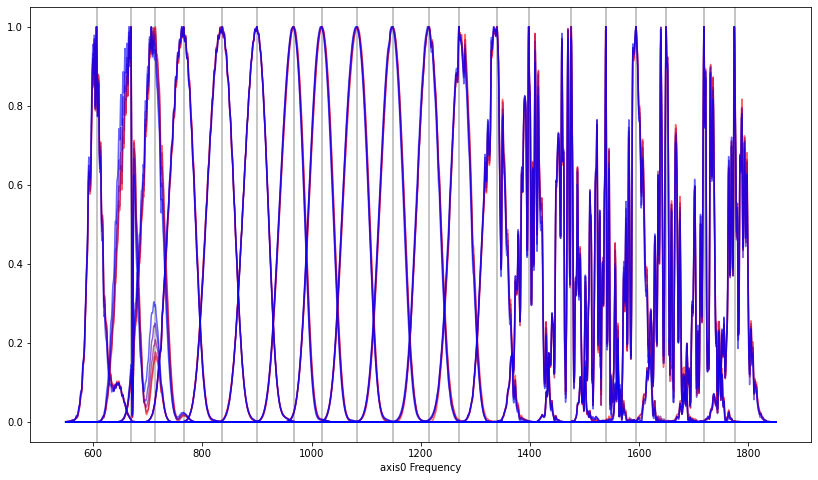

In [820]:
plt.figure(figsize=(14,8))

N=5
colors=list(zip(np.linspace(1,0,N),[0]*5,np.linspace(0,1,N)))

Ss=[]
f0s=[]
js=range(N)
maxes=[]
for j in js:
    for i in range(20):

        s=get_spectrum('Broadband day 4/Replication 600-1800 cm-1 swept 5x_tunedUpPower/interferogram%i.txt'%(j*20+i+1),
                      recompute=True)
        add=s.cslice[550:1850].copy()
        #add=np.abs(add)
        max=np.abs(add).max()
        add/=max
        
        #bandwidth
        if j==js[0]:
            f0=np.abs(add).locate(np.abs(add).max())[0][0]
            print(i,f0)
            plt.axvline(f0,alpha=.3,color='k')
            f0s.append(f0)
            maxes.append(max)
        add=apply_window(add,f0s[i],df=40,edge=30)
        np.abs(add).plot(color=colors[j],alpha=.6)
            
        if i==0: S=add; f=add.axes[0]
        else: S=add_spectra(S,add)
    Ss.append(S)
    

Ss=[S.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True) for S in Ss]

(0.0, 1.4)

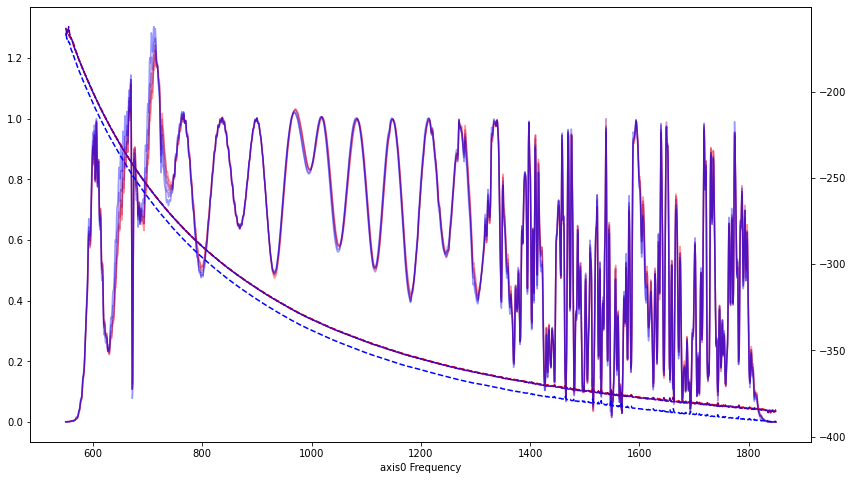

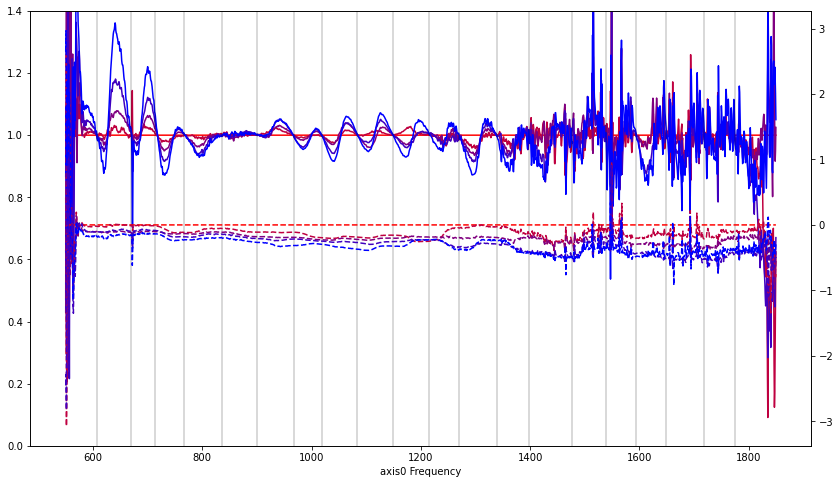

In [821]:
plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S).plot(color=colors[j],alpha=.4)
    ax2.plot(f,np.unwrap(np.angle(S)-.3*f,\
                         discont=1*np.pi),color=colors[j],ls='--')


plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
Sref=Ss[0]
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S/Sref).plot(color=colors[j])
    ax2.plot(f,np.angle(S/Sref),color=colors[j],ls='--')
for i in range(20): plt.axvline(f0s[i],color='k',alpha=.2)
#plt.axhline(1,color='k',alpha=.2)
#plt.ylim(.8,1.2)
plt.ylim(0,1.4)

# Broadband day 4/Replication 600-1800 cm-1 swept 5x_tunedDownPower

In [822]:
from scipy.optimize import minimize

def add_spectra(S,add):
    
    f=S.axes[0]
    add=add.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True)
    
    add0=np.array(add); S0=np.array(S)
    def to_minimize(x,*args):
        phi=x[0]
        add0_tuned=add0*np.exp(1j*f*phi)
        return 1/np.sum(np.abs(add0_tuned+S0)**2)
    
    #result=minimize(to_minimize,(0,),bounds=[(-1e-2,1e-2)],method='Powell')
    #phi=result['x'][0]
    phi=0
    print('phi=%s'%phi)
    
    return S + np.exp(1j*f*phi)*add

<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
0 606.0007292168563
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
1 668.9444513675573
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
2 706.4428390318047
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
3 765.3688767899079
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
4 836.3479341229016
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
5 899.2047316854629
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
6 966.2219241614159
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
7 1018.3845508857274
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
8 1082.7310127297362
phi=0
<numerics.Spectrum.__ne

phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
phi=0
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
phi=0


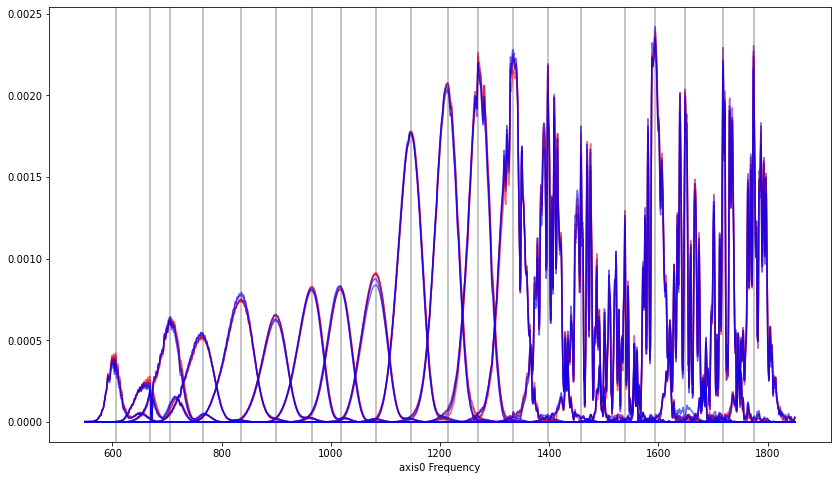

In [826]:
plt.figure(figsize=(14,8))

N=5
colors=list(zip(np.linspace(1,0,N),[0]*5,np.linspace(0,1,N)))

Ss=[]
f0s=[]
js=range(N)
maxes=[]
for j in js:
    for i in range(20):

        s=get_spectrum('Broadband day 4/Replication 600-1800 cm-1 swept 5x_tunedDownPower/interferogram%i.txt'%(j*20+i+1),
                      recompute=True)
        add=s.cslice[550:1850].copy()
        #add=np.abs(add)
        max=np.abs(add).max()
        #add/=max
        
        #bandwidth
        if j==js[0]:
            f0=np.abs(add).locate(np.abs(add).max())[0][0]
            print(i,f0)
            plt.axvline(f0,alpha=.3,color='k')
            f0s.append(f0)
            maxes.append(max)
        add=apply_window(add,f0s[i],df=60,edge=30)
        np.abs(add).plot(color=colors[j],alpha=.6)
            
        if i==0: S=add; f=add.axes[0]
        else: S=add_spectra(S,add)
    Ss.append(S)
    

Ss=[S.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True) for S in Ss]

(0.0, 1.4)

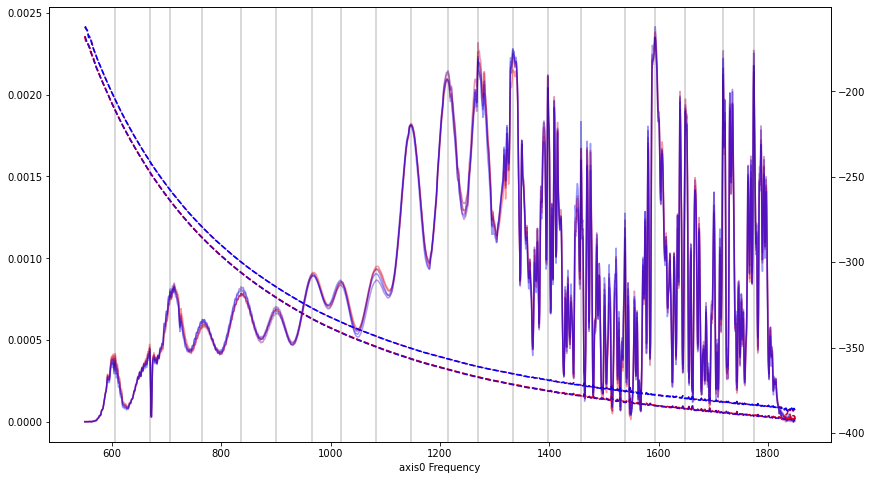

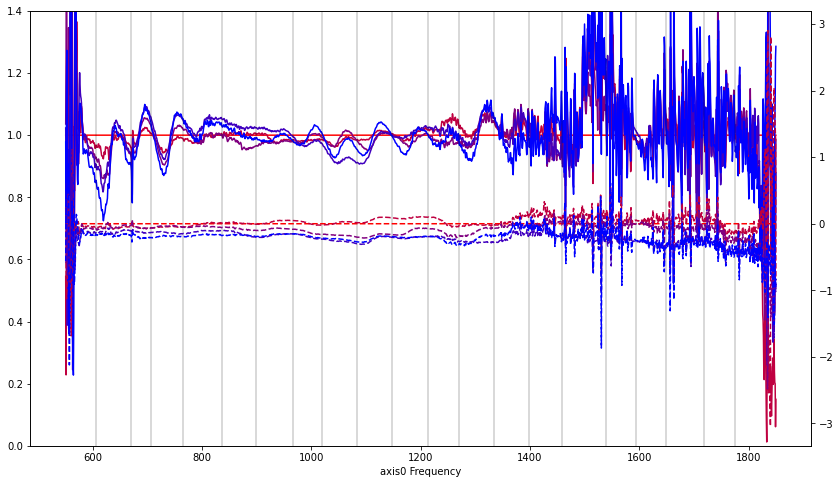

In [828]:
plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S).plot(color=colors[j],alpha=.4)
    ax2.plot(f,np.unwrap(np.angle(S)-.3*f,\
                         discont=1*np.pi),color=colors[j],ls='--')
for i in range(20): plt.axvline(f0s[i],color='k',alpha=.2)


plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
Sref=Ss[0]
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S/Sref).plot(color=colors[j])
    ax2.plot(f,np.angle(S/Sref),color=colors[j],ls='--')
for i in range(20): plt.axvline(f0s[i],color='k',alpha=.2)
#plt.axhline(1,color='k',alpha=.2)
#plt.ylim(.8,1.2)
plt.ylim(0,1.4)

# Broadband day 5/Replication 600-1800 cm-1 swept 5x_filtered200kHz

In [845]:
from scipy.optimize import minimize

def add_spectra(S,add):
    
    f=S.axes[0]
    add=add.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True)
    
    add0=np.array(add); S0=np.array(S)
    def to_minimize(x,*args):
        phi=x[0]
        add0_tuned=add0*np.exp(1j*f*phi)
        return 1/np.sum(np.abs(add0_tuned+S0)**2)
    
    #result=minimize(to_minimize,(0,),bounds=[(-1e-2,1e-2)],method='Powell')
    #phi=result['x'][0]
    phi=0
    print('phi=%s'%phi)
    
    return S + np.exp(1j*f*phi)*add

<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
0 1138.24977572843
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.


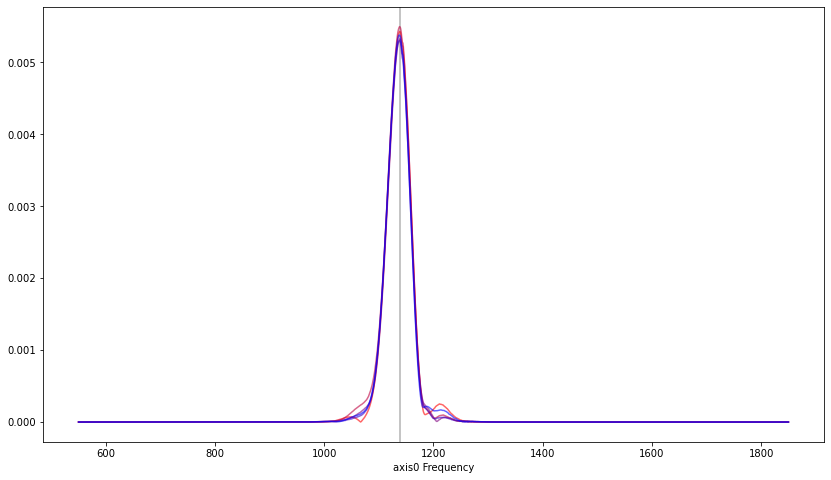

In [873]:
plt.figure(figsize=(14,8))

N=5
colors=list(zip(np.linspace(1,0,N),[0]*N,np.linspace(0,1,N)))

Ss=[]
f0s=[]
js=range(N)
maxes=[]
for j in js:
    for i in range(1):

        s=get_spectrum('Broadband day 5/Replication 600-1800 cm-1 swept 5x_filtered200kHz/interferogram%i.txt'%(j*20+i+1+9),
                      recompute=True)
        add=s.cslice[550:1850].copy()
        #add=np.abs(add)
        max=np.abs(add).max()
        #add/=max
        
        #bandwidth
        if j==js[0]:
            f0=np.abs(add).locate(np.abs(add).max())[0][0]
            print(i,f0)
            plt.axvline(f0,alpha=.3,color='k')
            f0s.append(f0)
            maxes.append(max)
        add=apply_window(add,f0s[i],df=100,edge=30)
        np.abs(add).plot(color=colors[j],alpha=.6)
            
        if i==0: S=add; f=add.axes[0]
        else: S=add_spectra(S,add)
    Ss.append(S)
    

Ss=[S.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True) for S in Ss]

(0.0, 1.4)

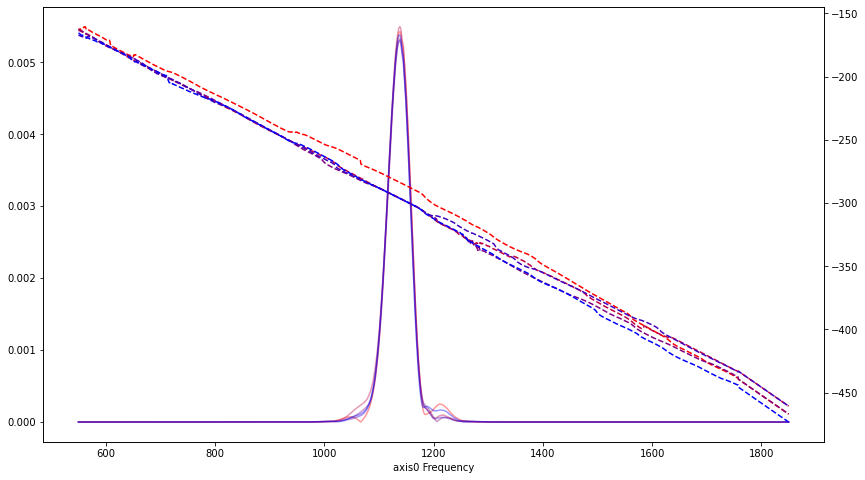

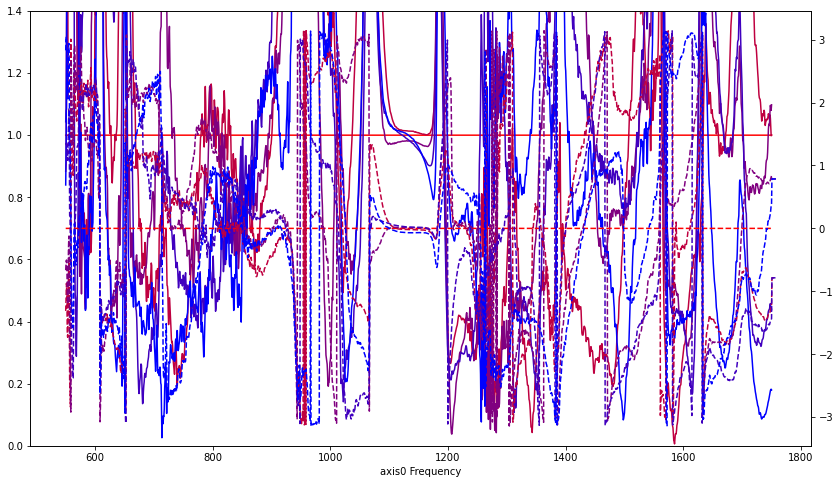

In [874]:
plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S).plot(color=colors[j],alpha=.4)
    ax2.plot(f,np.unwrap(np.angle(S)-.3*f,\
                         discont=1*np.pi),color=colors[j],ls='--')
#for i in range(20): plt.axvline(f0s[i],color='k',alpha=.2)


plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
Sref=Ss[0]
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S/Sref).plot(color=colors[j])
    ax2.plot(f,np.angle(S/Sref),color=colors[j],ls='--')
#for i in range(20): plt.axvline(f0s[i],color='k',alpha=.2)
#plt.axhline(1,color='k',alpha=.2)
#plt.ylim(.8,1.2)
plt.ylim(0,1.4)

# Broadband day 5/Replication 1150 cm-1 repeated 100x

In [870]:
from scipy.optimize import minimize

def add_spectra(S,add):
    
    f=S.axes[0]
    add=add.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True)
    
    add0=np.array(add); S0=np.array(S)
    def to_minimize(x,*args):
        phi=x[0]
        add0_tuned=add0*np.exp(1j*f*phi)
        return 1/np.sum(np.abs(add0_tuned+S0)**2)
    
    #result=minimize(to_minimize,(0,),bounds=[(-1e-2,1e-2)],method='Powell')
    #phi=result['x'][0]
    phi=0
    print('phi=%s'%phi)
    
    return S + np.exp(1j*f*phi)*add

0 1138.947457019016


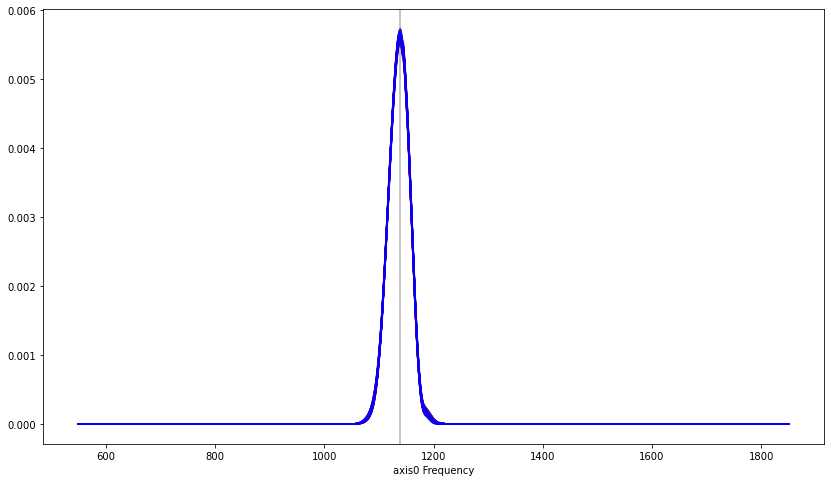

In [881]:
plt.figure(figsize=(14,8))

N=100
colors=list(zip(np.linspace(1,0,N),[0]*N,np.linspace(0,1,N)))

Ss=[]
f0s=[]
js=range(N)
maxes=[]
i=0
for j in js:

    s=get_spectrum('Broadband day 5/Replication 1150 cm-1 repeated 100x/interferogram%i.txt'%(j+1),
                  recompute=False)
    add=s.cslice[550:1850].copy()
    #add=np.abs(add)
    max=np.abs(add).max()
    #add/=max

    #bandwidth
    if j==js[0]:
        f0=np.abs(add).locate(np.abs(add).max())[0][0]
        print(i,f0)
        plt.axvline(f0,alpha=.3,color='k')
        f0s.append(f0)
        maxes.append(max)
    add=apply_window(add,f0s[i],df=50,edge=30)
    np.abs(add).plot(color=colors[j],alpha=.6)

    S=add; f=add.axes[0]
    Ss.append(S)
    

Ss=[S.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True) for S in Ss]

(1050.0, 1200.0)

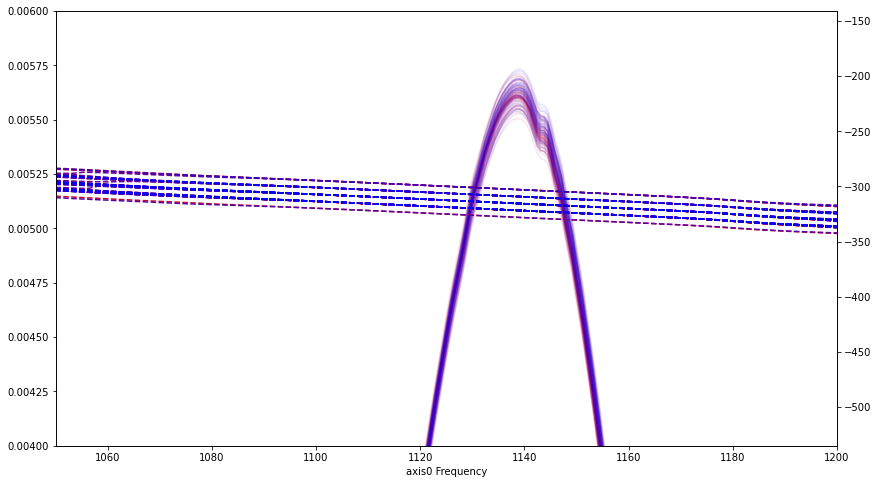

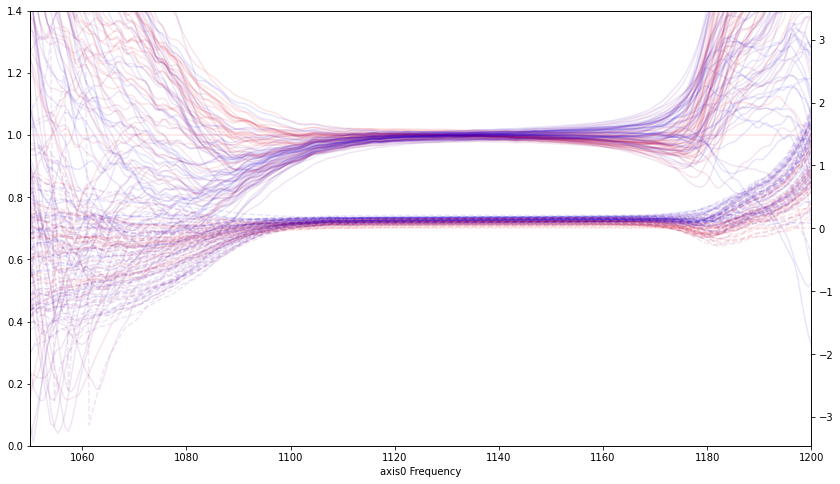

In [882]:
plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S).plot(color=colors[j],alpha=.1)
    ax2.plot(f,np.unwrap(np.angle(S)-.3*f,\
                         discont=1*np.pi),color=colors[j],ls='--')
plt.sca(ax1); plt.xlim(1050,1200)
plt.ylim(4e-3,6e-3)


plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
Sref=Ss[0]
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S/Sref).plot(color=colors[j],alpha=.1)
    ax2.plot(f,np.angle(S/Sref),color=colors[j],ls='--',alpha=.1)
#plt.axhline(1,color='k',alpha=.2)
#plt.ylim(.8,1.2)
plt.ylim(0,1.4)
plt.xlim(1050,1200)


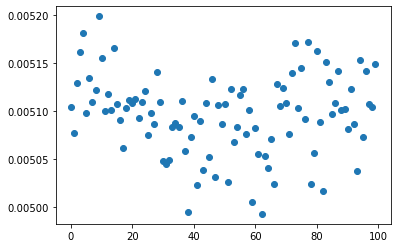

In [883]:
plt.plot([np.abs(S.cslice[1130]) for S in Ss],marker='o',ls='')

# Broadband day 6/Replication 600-1800 cm-1 40x swept 2x

<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
0 599.0536620963644
<numerics.Spectrum.__new__>:
	Interpolating to evenly-spaced samples along *axis*.
1 668.720668815593


NameError: name 'add_spectra' is not defined

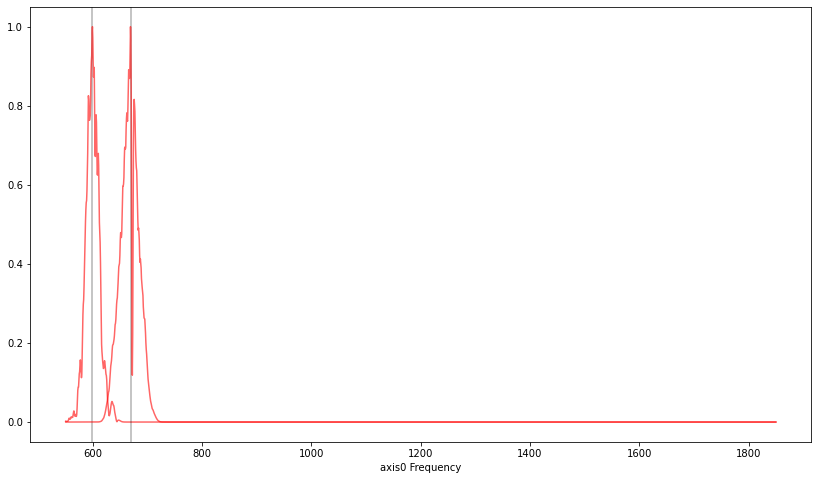

In [9]:
plt.figure(figsize=(14,8))

N=3
M=40
colors=list(zip(np.linspace(1,0,N),[0]*5,np.linspace(0,1,N)))

Ss=[]
f0s=[]
js=range(N)
maxes=[]
for j in js:
    for i in range(M):

        s=get_spectrum('Data/Broadband day 6/Replication 600-1800 cm-1 40x swept 2x/interferogram%i.txt'%(j*M+i+1),
                      recompute=False)
        add=s.cslice[550:1850].copy()
        #add=np.abs(add)
        max=np.abs(add).max()
        add/=max
        
        #bandwidth
        if j==js[0]:
            f0=add.axes[0][np.argmax(np.abs(add))]
            print(i,f0)
            plt.axvline(f0,alpha=.3,color='k')
            f0s.append(f0)
            maxes.append(max)
        add=apply_window(add,f0s[i],df=30,edge=30)
        np.abs(add).plot(color=colors[j],alpha=.6)
            
        if i==0: S=add; f=add.axes[0]
        else: S=add_spectra(S,add)
    Ss.append(S)
    

Ss=[S.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True) for S in Ss]

IndexError: list index out of range

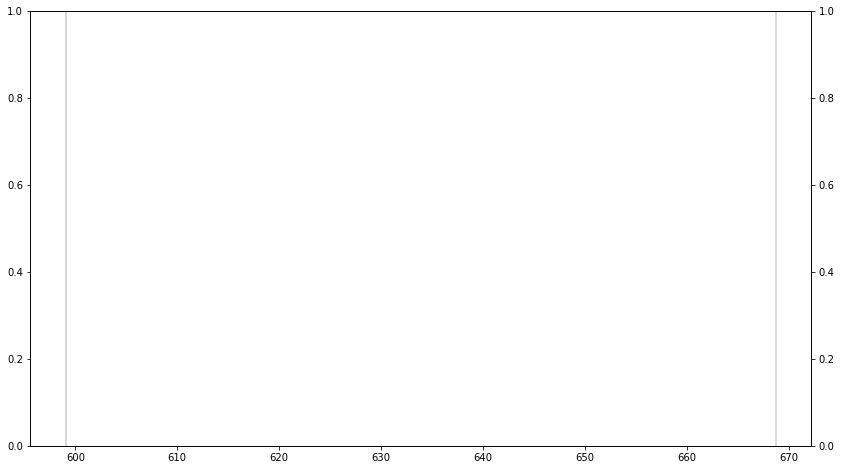

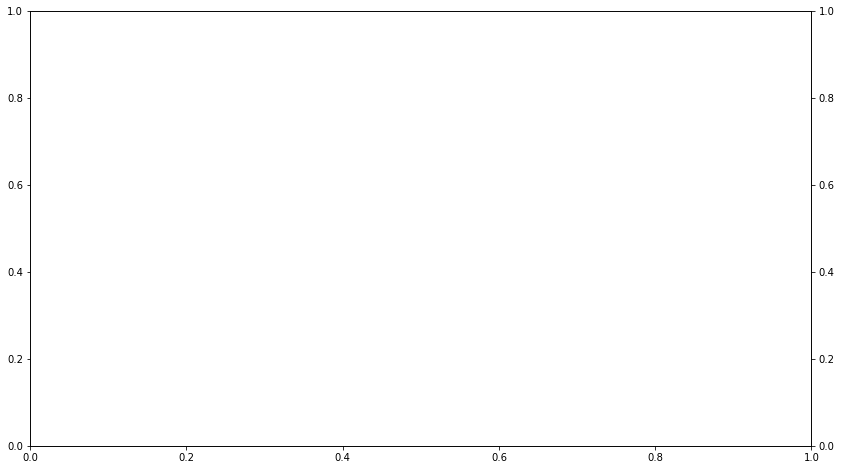

In [10]:
plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S).plot(color=colors[j],alpha=.4)
    ax2.plot(f,np.unwrap(np.angle(S)-0.15*f,\
                         discont=1*np.pi),color=colors[j],ls='--')
for i in range(len(f0s)): plt.axvline(f0s[i],color='k',alpha=.2)


plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
Sref=Ss[0]
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S/Sref).plot(color=colors[j])
    ax2.plot(f,np.angle(S/Sref),color=colors[j],ls='--')
for i in range(len(f0s)): plt.axvline(f0s[i],color='k',alpha=.2)
#plt.axhline(1,color='k',alpha=.2)
#plt.ylim(.8,1.2)
plt.ylim(0,1.4)

In [62]:
def fit_envelope(f,sabs,fmin=400,expand_envelope=2):

    global result
    sub=f>fmin
    fsub=f[sub]
    sabssub=sabs[sub]
    ind=np.argmax(sabssub)
    A=sabssub[ind]
    f0 = fsub[ind]
    df = f0/10
    x0=np.array([A,f0,df])
    print(x0)

    from scipy.optimize import minimize,leastsq

    model = lambda f,A,f0,df: A*np.exp(-(f-f0)**2/(2*df**2))

    def to_minimize(x):

        A,f0,df=x
        delta = sabssub-model(fsub,A,f0,df)
        return delta

    result=leastsq(to_minimize,x0)

    envelope = model(f,*result[0])
    envelope = envelope**(1/expand_envelope**2)

    return envelope

In [73]:
sd.blah

<function scandelay.blah(spectra, apply_envelope=True)>

[5.85115370e-08 6.68720669e+02 6.68720669e+01]


(500.0, 1000.0)

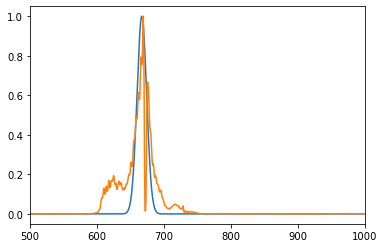

In [66]:
spow=s.folded
f=spow.axes[0]
spow=np.array(spow)
env = fit_envelope(f,spow,expand_envelope=.5)
plt.plot(f,env/env.max())
plt.plot(f,spow/spow.max())

#print(result.x)
plt.xlim(500,1000)

# Broadband day 6/Replication 600-1800 cm-1 40x swept 3x

0 632.3714257091531
1 668.648305153713
phi=0
2 704.1933003123356
phi=0
3 689.4165250507941
phi=0
4 696.1678717445386
phi=0
5 715.5945251745353
phi=0
6 755.1878528154485
phi=0
7 765.9435147707361
phi=0
8 814.9048777989881
phi=0
9 832.3163090895687
phi=0
10 881.3045335903399
phi=0
11 900.6676966719452
phi=0
12 938.2840583531884
phi=0
13 971.1788173275183
phi=0
14 995.8662461547708
phi=0
15 1020.6791151907562
phi=0
16 1050.8907536523293
phi=0
17 1085.0933244476507
phi=0
18 1113.8948394518548
phi=0
19 1152.1200085359942
phi=0
20 1176.81890820862
phi=0
21 1215.0795852195365
phi=0
22 1253.2213564569404
phi=0
23 1269.9436437168256
phi=0
24 1306.8216768891625
phi=0
25 1333.0145315505026
phi=0
26 1373.3349837359883
phi=0
27 1397.4305454477267
phi=0
28 1434.4034778280786
phi=0
29 1458.3566701866162
phi=0
30 1487.236536246385
phi=0
31 1538.867380832035
phi=0
32 1556.4016099859516
phi=0
33 1589.1571645193565
phi=0
34 1621.2903136473658
phi=0
35 1639.8528507105514
phi=0
36 1674.930951427999
phi=0
3

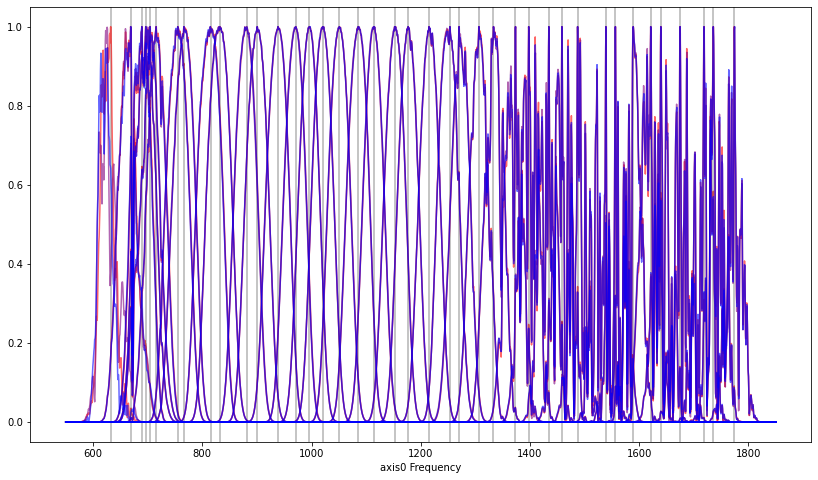

In [1019]:
plt.figure(figsize=(14,8))

N=3
M=40
colors=list(zip(np.linspace(1,0,N),[0]*5,np.linspace(0,1,N)))

Ss=[]
f0s=[]
js=range(N)
maxes=[]
for j in js:
    for i in range(M):

        s=get_spectrum('Broadband day 6/Replication 600-1800 cm-1 40x swept 3x/interferogram%i.txt'%(j*M+i+1),
                      recompute=False)
        add=s.cslice[550:1850].copy()
        #add=np.abs(add)
        max=np.abs(add).max()
        add/=max
        
        #bandwidth
        if j==js[0]:
            f0=add.axes[0][np.argmax(np.abs(add))]
            print(i,f0)
            plt.axvline(f0,alpha=.3,color='k')
            f0s.append(f0)
            maxes.append(max)
        add=apply_window(add,f0s[i],df=30,edge=30)
        np.abs(add).plot(color=colors[j],alpha=.6)
            
        if i==0: S=add; f=add.axes[0]
        else: S=add_spectra(S,add)
    Ss.append(S)
    

Ss=[S.interpolate_axis(f,axis=0,bounds_error=False,extrapolate=True) for S in Ss]

(0.0, 1.4)

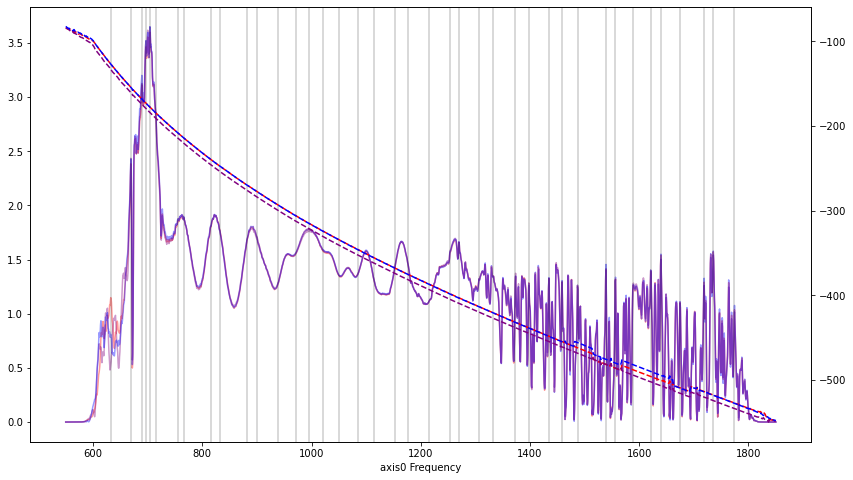

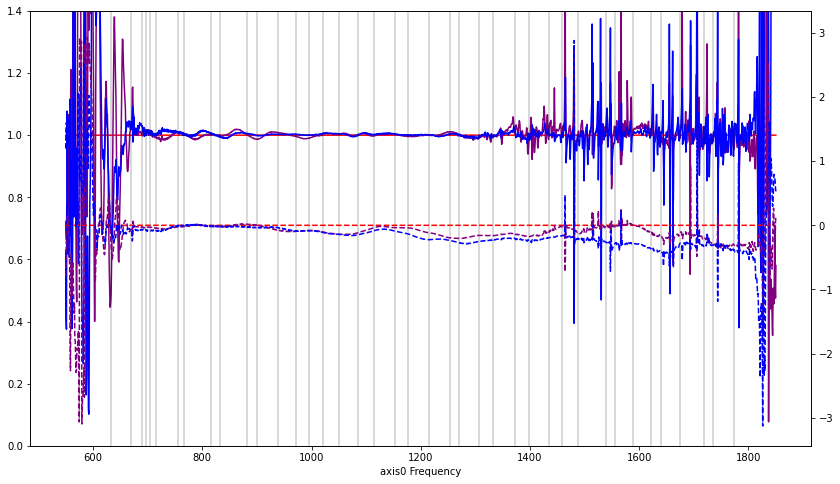

In [1020]:
plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S).plot(color=colors[j],alpha=.4)
    ax2.plot(f,np.unwrap(np.angle(S)-0.15*f,\
                         discont=1*np.pi),color=colors[j],ls='--')
for i in range(len(f0s)): plt.axvline(f0s[i],color='k',alpha=.2)


plt.figure(figsize=(14,8))
ax1=plt.gca()
ax2=plt.twinx()
Sref=Ss[0]
for j,S in enumerate(Ss):
    plt.sca(ax1)
    np.abs(S/Sref).plot(color=colors[j])
    ax2.plot(f,np.angle(S/Sref),color=colors[j],ls='--')
for i in range(len(f0s)): plt.axvline(f0s[i],color='k',alpha=.2)
#plt.axhline(1,color='k',alpha=.2)
#plt.ylim(.8,1.2)
plt.ylim(0,1.4)

# Program Alpha

In [ ]:
from websocket import create_connection
import time
import numpy as np

class WsHandler(object):

    latest_socket = 8000

    def __init__(self, uri,timeout=1):
        self.useJSON = True

        full_uri = ':'.join((uri, str(self.latest_socket)))
        try:
            self.ws = create_connection(full_uri, timeout)
            self.connected = True
            print("%s connected!" % full_uri)
            #WsHandler.latest_socket +=1 #increment the socket index, we don't want to reconnect to this one

        except:
            print("Error: Could not connect to %s" % full_uri)
            self.connected = False

    def _toJSON(self, msg, cmd_id=100):
        return ('{"cmd_id":%d,"data":"%s"}' % (cmd_id, msg))

    def _fromJSON(self, msg):
        return msg.split("data")[1].replace('""', '').replace(":", "").replace("}", "")

    def send(self, msg):
        if not self.connected:
            return
        
        print("sending cmd: %s" % msg)
        if self.useJSON:
            self.ws.send(self._toJSON(msg))
        else:
            self.ws.send(msg)

    def recv(self):
        if not self.connected:
            return
        if self.useJSON:
            return self._fromJSON(self.ws.recv())
        else:
            return self.recv()

    def close(self):
        if not self.connected:
            return
        self.ws.close()

alpha_uri = "ws://192.168.51.1"  # alpha address

In [109]:
def wn_to_wl(wn): return np.round(1e7/wn)

In [1023]:
wn_to_wl(1200)

8333.0

In [967]:
#def wn_to_pump(wn,pump_vals={600:100,1000:5,1800:15}):

def pump_generator(wns=(600,1000,1200,1400,1800),
                   pump_vals=(100,10,5,7,15)):
    xs=wns
    ys=pump_vals
    
    N=len(pump_vals)+1
    coeffs=sym.symbols(' '.join(['c%i'%i for i in range(N)]))
    x=sym.symbols('x')
    xmin=xs[np.argmin(pump_vals)]

    p=sum([coeffs[i]*x**i for i in range(N)])
    ps = [p.subs(x,xs[i])-ys[i] for i in range(N-1)]
    ps.append(sym.diff(p,x).subs(x,xmin))
    sol=sym.solve(ps,dict=True)[0]
    polyfunc=sym.lambdify(x,p.subs(sol))
    
    return polyfunc

In [970]:
N=40
wns=np.linspace(600,1800,N)
wls = wn_to_wl(wns).astype(int)
#pumps=np.linspace(4,2,N)*.002/np.array(maxes)
pumps=wn_to_pump(wns)

5.0

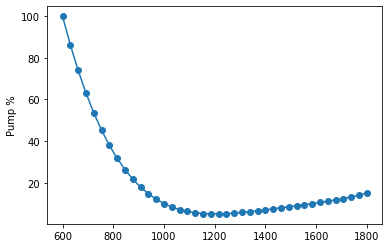

In [973]:
pumpfunc=pump_generator()
pumps=pumpfunc(wns)
plt.plot(wns,pumps,marker='o')
plt.ylabel('Pump %')
pumpfunc(1200)

In [975]:
print(wls)
print(pumps)

[16667 15854 15116 14444 13830 13265 12745 12264 11818 11404 11017 10656
 10317 10000  9701  9420  9155  8904  8667  8442  8228  8025  7831  7647
  7471  7303  7143  6989  6842  6701  6566  6436  6311  6190  6075  5963
  5856  5752  5652  5556]
[100.          86.22755374  73.98210368  63.14496907  53.6030664
  45.24881368  37.98003464  31.69986297  26.3166466   21.74385189
  17.89996789  14.70841058  12.0974271   10.           8.35375147
   7.10084758   6.18790252   5.56588283   5.19001166   5.01967299
   5.01831587   5.15335867   5.39609329   5.72158945   6.10859887
   6.53945955   7.           7.47944346   7.97031216   8.46833154
   8.97233452   9.48416569  10.00858561  10.55317499  11.12823894
  11.74671127  12.42405863  13.17818482  14.02933502  15.        ]


In [976]:
Ws=WsHandler(alpha_uri)
try:
    for i in range(len(wls)):
        print('Iteration i=%i'%i)

        cmd = "@mir setsignal %i"%wls[i]
        Ws.send(cmd)
        time.sleep(22)  # make sure the delay is at least 0.5 s

        cmd = "@mir setpump %1.1f"%pumps[i]
        Ws.send(cmd)
        time.sleep(2)  # make sure the delay is at least 0.5 s

        cmd = "@rep save %i"%i
        Ws.send(cmd)
        time.sleep(2)  # make sure the delay is at least 0.5 s
except:
    Ws.close()
    raise
    
    

ws://192.168.51.1:8000 connected!
Iteration i=0
sending cmd: @mir setsignal 16667
sending cmd: @mir setpump 100.0
sending cmd: @rep save 0
Iteration i=1
sending cmd: @mir setsignal 15854
sending cmd: @mir setpump 86.2
sending cmd: @rep save 1
Iteration i=2
sending cmd: @mir setsignal 15116
sending cmd: @mir setpump 74.0
sending cmd: @rep save 2
Iteration i=3
sending cmd: @mir setsignal 14444
sending cmd: @mir setpump 63.1
sending cmd: @rep save 3
Iteration i=4
sending cmd: @mir setsignal 13830
sending cmd: @mir setpump 53.6
sending cmd: @rep save 4
Iteration i=5
sending cmd: @mir setsignal 13265
sending cmd: @mir setpump 45.2
sending cmd: @rep save 5
Iteration i=6
sending cmd: @mir setsignal 12745
sending cmd: @mir setpump 38.0
sending cmd: @rep save 6
Iteration i=7
sending cmd: @mir setsignal 12264
sending cmd: @mir setpump 31.7
sending cmd: @rep save 7
Iteration i=8
sending cmd: @mir setsignal 11818
sending cmd: @mir setpump 26.3
sending cmd: @rep save 8
Iteration i=9
sending cmd: @m

In [842]:
Ws=WsHandler(alpha_uri)
try:
    for i in range(20):
        print('Iteration i=%i'%i)

        cmd = "@rep load %i"%i
        Ws.send(cmd)
        time.sleep(10)  # make sure the delay is at least 0.5 s

        """cmd = "@mir optimize"
        Ws.send(cmd)
        time.sleep(7)  # make sure the delay is at least 0.5 s"""

        cmd = "@mir setpump %i"%20 #np.min((100,pumps_new[i]))
        Ws.send(cmd)
        time.sleep(1)  # make sure the delay is at least 0.5 s"""

        cmd = "@rep save %i"%i
        Ws.send(cmd)
        time.sleep(1)  # make sure the delay is at least 0.5 s
except:
    Ws.close()
    raise

ws://192.168.51.1:8000 connected!
Iteration i=0
sending cmd: @rep load 0
sending cmd: @mir setpump 20
sending cmd: @rep save 0
Iteration i=1
sending cmd: @rep load 1
sending cmd: @mir setpump 20
sending cmd: @rep save 1
Iteration i=2
sending cmd: @rep load 2
sending cmd: @mir setpump 20
sending cmd: @rep save 2
Iteration i=3
sending cmd: @rep load 3
sending cmd: @mir setpump 20
sending cmd: @rep save 3
Iteration i=4
sending cmd: @rep load 4
sending cmd: @mir setpump 20
sending cmd: @rep save 4
Iteration i=5
sending cmd: @rep load 5
sending cmd: @mir setpump 20
sending cmd: @rep save 5
Iteration i=6
sending cmd: @rep load 6
sending cmd: @mir setpump 20
sending cmd: @rep save 6
Iteration i=7
sending cmd: @rep load 7
sending cmd: @mir setpump 20
sending cmd: @rep save 7
Iteration i=8
sending cmd: @rep load 8
sending cmd: @mir setpump 20
sending cmd: @rep save 8
Iteration i=9
sending cmd: @rep load 9
sending cmd: @mir setpump 20
sending cmd: @rep save 9
Iteration i=10
sending cmd: @rep loa

In [844]:
wls

array([16667, 15079, 13768, 12667, 11728, 10920, 10215,  9596,  9048,
        8559,  8120,  7724,  7364,  7037,  6738,  6463,  6209,  5975,
        5758,  5556])